## Mathematical Optimization Series

# Part 3: Conservative steplength rules

In our previous post we described how the steplength parameter $\alpha$ - whether fixed for all iterations or diminishing - is often determined by trial and eror for machine learning / deep learning problems.  In this post we discuss the mathematical framework that provides - essentially irregardless of the function being minimized - choices for $\alpha$ that are guaranteed to produce convergence.  These choices - however - have a few tradeoffs.  First of all they are often *conservative*, specifically defined to force descent in the function at each step.  They also can be be computationally expensive depending on the function being minimized and how they are employed.  Nonetheless they always provide solutions that work 'out of the box' in most situations.

In particular here we will discuss the notions of *backtracking line search* as well as the conserviatively optimal fixed steplength defined by a function's *Lipschitz constant*.

In [33]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as callib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import linear_algebra_library as linlib
import autograd.numpy as np
import time

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Fixed step length rules for gradient descent

In the following two Sections we discuss two of the most popular ways of automatically determining proper step lengths for each step of a gradient descent run, which we refer to as step length rules. In particular we discuss two commonly used rules which guarantee, mathematically speaking, convergence of the gradient descent algorithm to a stationary point: fixed and adaptive step length rules each of which has practical strengths and weaknesses. While typically providing a conservative (i.e., small) step length that is kept fixed for all iterations, the fixed step length rule discussed first provides both a convenient choice for many of the cost functions described in this book as well as a benchmark by which to easily test larger fixed values. On the other hand, with the adaptive rule discussed second we adaptively compute the step length at each gradient descent step by using local information from the part of the cost function near the current step. This typically produces larger steps in practice than a fixed rule, meaning fewer steps are necessary for convergence, but the determination of each step requires computation.

## 1.1 Gradient descent and simple quadratic surrogates 

For example, we may consider the following simple quadratic function

\begin{equation}
h_{\alpha}\left(\mathbf{w}\right)=g\left(\mathbf{w}^{0}\right)+\nabla g\left(\mathbf{w}^{0}\right)^{T}\left(\mathbf{w}-\mathbf{w}^{0}\right)+\frac{1}{2\alpha}\left\Vert \mathbf{w}-\mathbf{w}^{0}\right\Vert _{2}^{2}
\end{equation}

where $\alpha>0$. This kind of quadratic is illustrated below for two different values of $\alpha$. Note that the larger the $\alpha$ the wider the associated quadratic becomes. Also, when $\mathbf{w}=\mathbf{w}^{0}$ the last two terms on the right hand side of disappear and we have $h_{\alpha}\left(\mathbf{w}^{0}\right)=g\left(\mathbf{w}^{0}\right)$.

FIGURE 1 GOES HERE

Our simple quadratic surrogate $h_{\alpha}$ has a unique global minimum
which may be found by checking the first order optimality condition by setting its gradient to
zero 

\begin{equation}
\nabla h_{\alpha}\left(\mathbf{w}\right)=\nabla g\left(\mathbf{w}^{0}\right)+\frac{1}{\alpha}\left(\mathbf{w}-\mathbf{w}^{0}\right)=\mathbf{0}
\end{equation}

and solving for an $\mathbf{w}$. Rearranging and solving for $\mathbf{w}$,
we can find the minimizer of $h_{\alpha}$, which we call $\mathbf{w}^{1}$,
as 

\begin{equation}
\mathbf{w}^{1}=\mathbf{w}^{0}-\alpha\nabla g\left(\mathbf{w}^{0}\right).
\end{equation}

Notice the minimizer of the quadratic in equation the equation above
is precisely a gradient descent step at $\mathbf{w}^{0}$ with a step
length of $\alpha$. Therefore our attempt at replacing the Hessian
with a very simple quadratic, and locating the minimum of that quadratic,
does not lead to a new descent method but to the familiar gradient
descent step. 

If we continue taking steps in this manner the $k^{\textrm{th}}$
update is found as the minimum of the simple quadratic surrogate associated
with the previous update $\mathbf{w}^{k-1}$

\begin{equation}
h_{\alpha}\left(\mathbf{w}\right)= g\left(\mathbf{w}^{k-1}\right)+ \nabla g\left(\mathbf{w}^{k-1}\right)^{T}\left(\mathbf{w}-\mathbf{w}^{k-1}\right)+\frac{1}{2\alpha}\left\Vert \mathbf{w}-\mathbf{w}^{k-1}\right\Vert _{2}^{2}
\end{equation}

where the minimum is given as the $k^{\textrm{th}}$ gradient descent
step 

\begin{equation}
\mathbf{w}^{k}=\mathbf{w}^{k-1}-\alpha\nabla g\left(\mathbf{w}^{k-1}\right).
\end{equation}

Therefore, as illustrated in Figure \ref{fig:grad descent linear and quad surogates},
we can interpret gradient descent as a method that uses linear surrogates
or simultaneously one that uses simple fixed curvature quadratic surrogates
to locate a stationary point of $g$. The chosen step length at the
$k^{\textrm{th}}$ iteration then determines how far along the linear
surrogate we move, or equivalently the width of the quadratic we minimize,
in order to reach the next point on $g$. 

FIGURE 2 GOES HERE

Using the simple quadratic perspective of gradient descent we can naturally wonder if, akin to the operation of Newton's method (see e.g., Figure [fig: Newton's method illustrated]), for a given cost function g we can design a step length rule such that we can 'hop down' the minima of the associated quadratic surrogates to reach a stationary point of g. As we describe in the remainder of this and the next Section, we absolutely can.

# 1.  Backtracking line search

## 1.1 Exact line search

Ideally looking down the direction of descent for the steplength providing the smallest value.  


$$
\alpha^\star = \underset{\alpha \in \mathcal{A}}{\text{argmin}} \,\,   g\left( \mathbf{w}^{k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1} \right) \right)
$$

It is almost always far more expensive to calculate this value than it is to use any other steplength rule (the exception being when the cost of evaluating a function's gradient is far greater than the cost of evaluating the function itself many times, since then it makes sense to try to limit our gradient evaluations).

.  Every steplength we try requires an evaluation of the function, and we have no sense in general what a) the maximum steplength value we should try and b) how many values in between zero and this maximum value to try.

# Examples with new colored contour plots

<IPython.core.display.Javascript object>


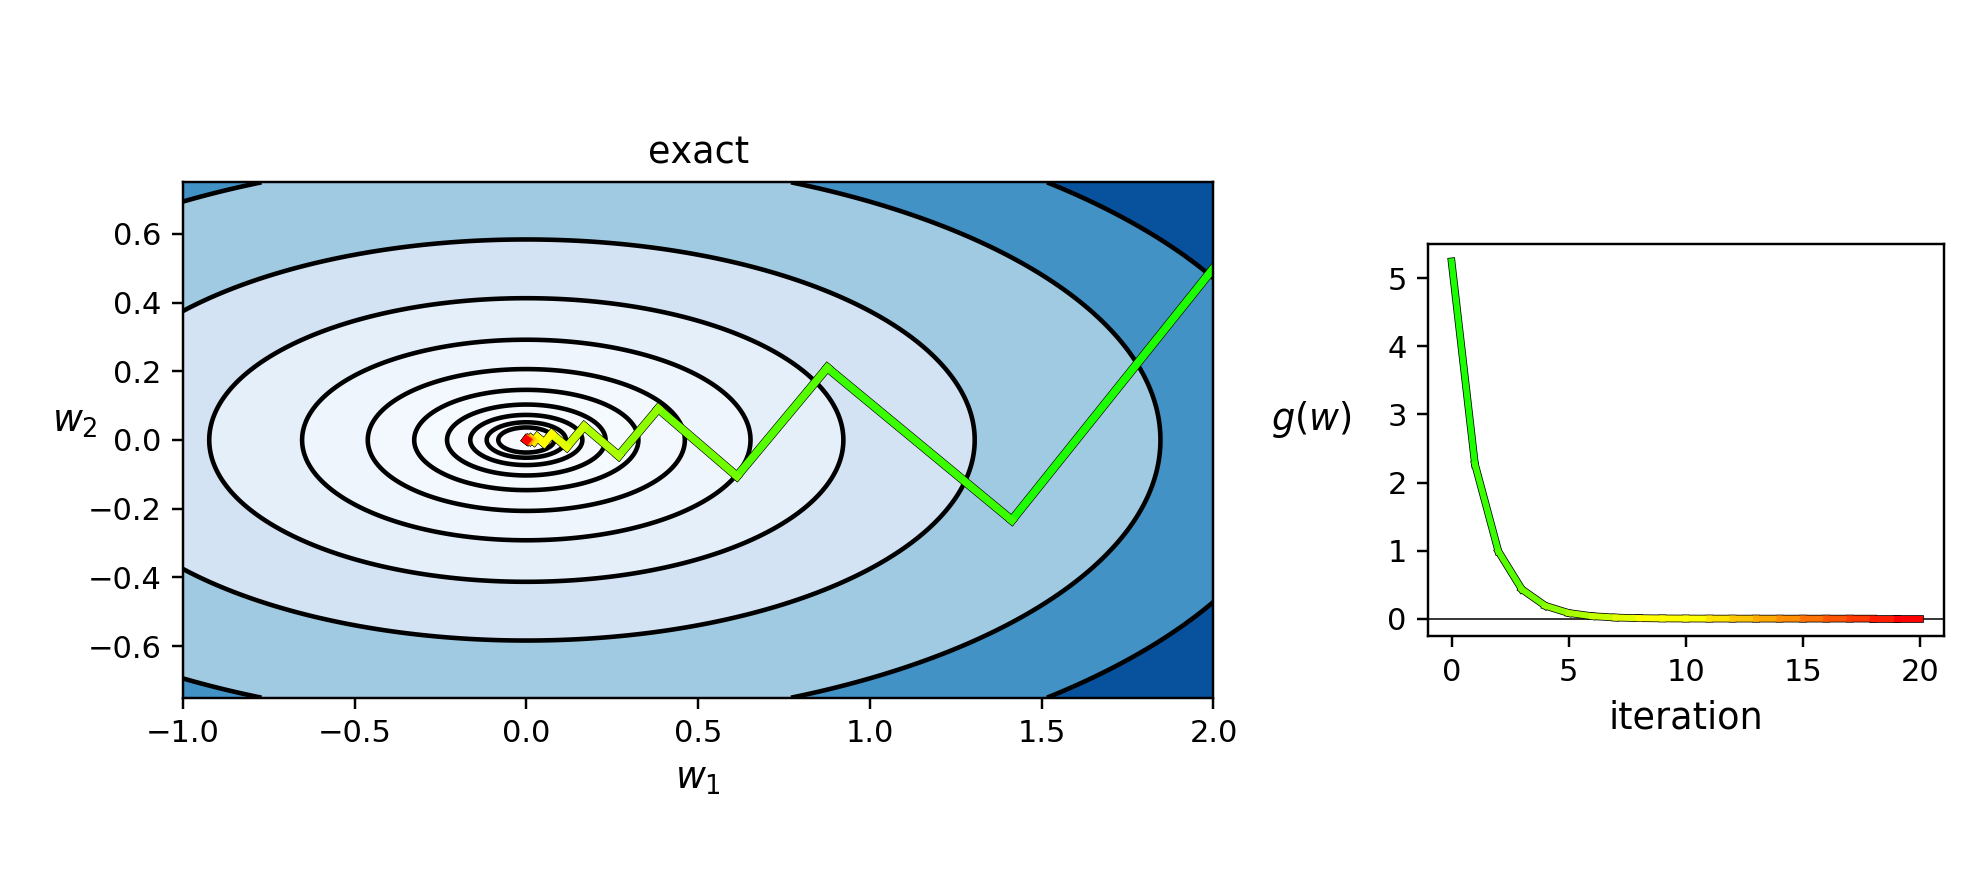

<IPython.core.display.Javascript object>


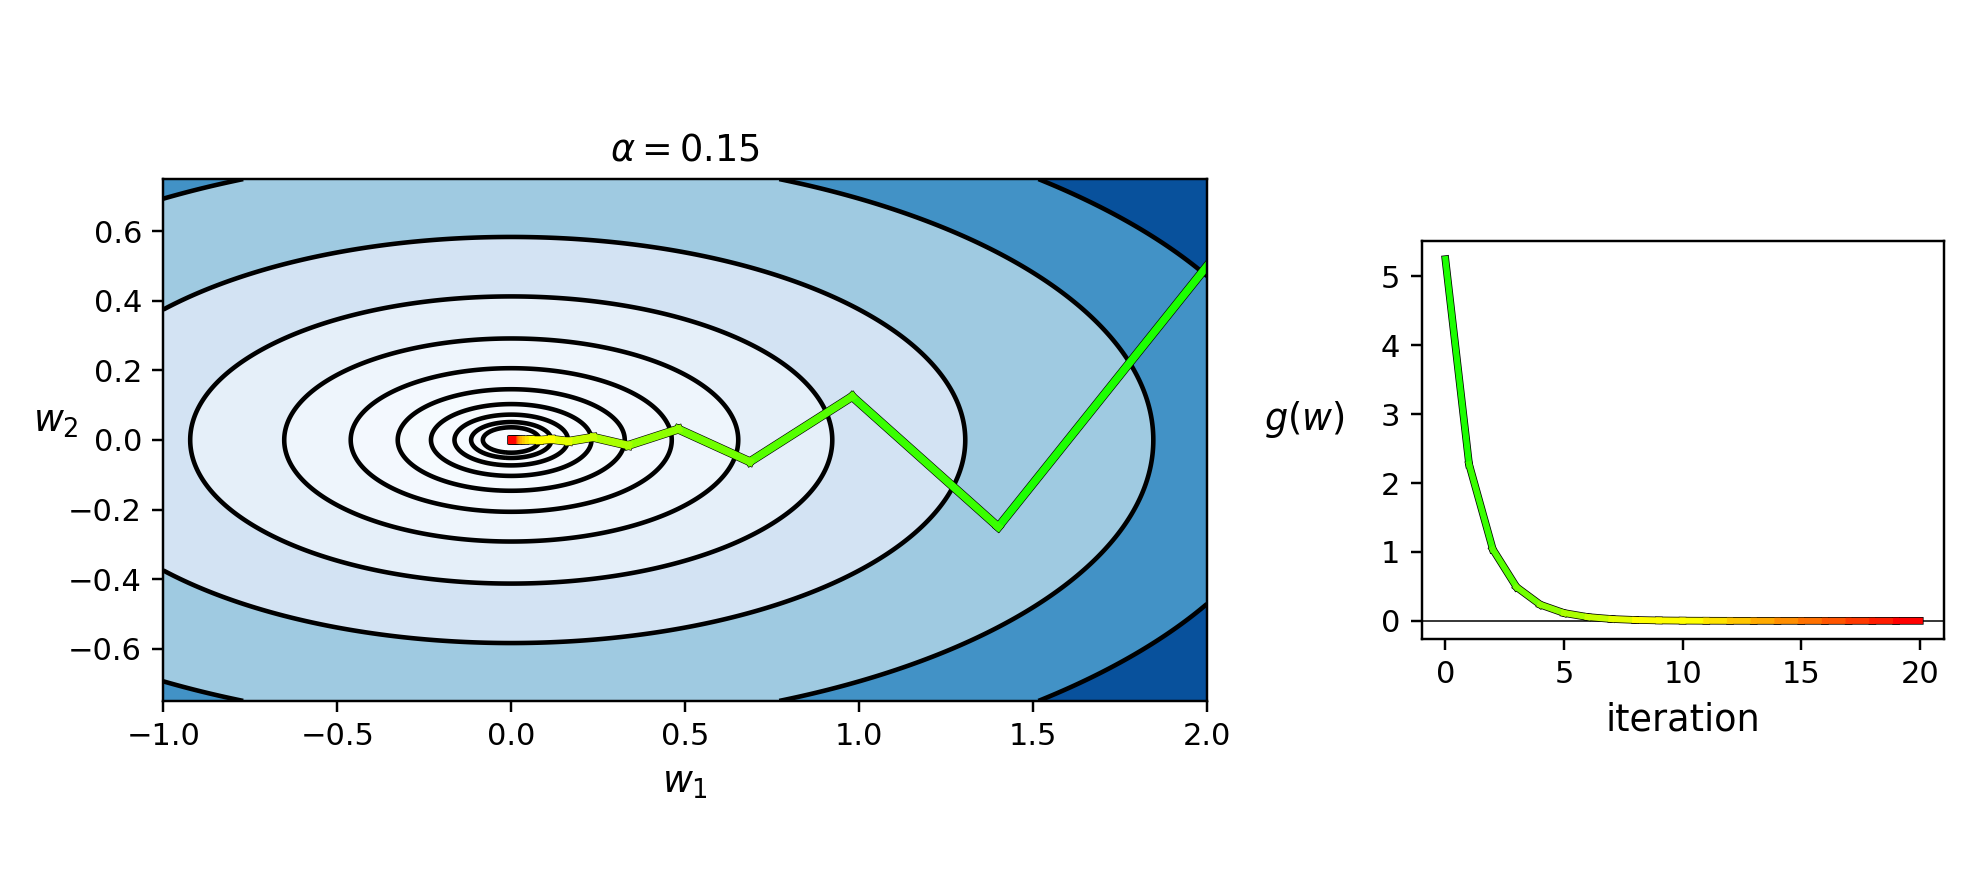

In [34]:
# what function should we play with?  Defined in the next line.
g = lambda w: w[0]**2 + 5*w[1]**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = [2,0.5]; max_its = 20; steplength_vals = ['exact',0.15];

demo.run(g,w_init,steplength_vals,max_its,version = 'unnormalized',num_contours = 30,xmin = -1, xmax = 2, ymin = -0.75, ymax = 0.75)

<IPython.core.display.Javascript object>


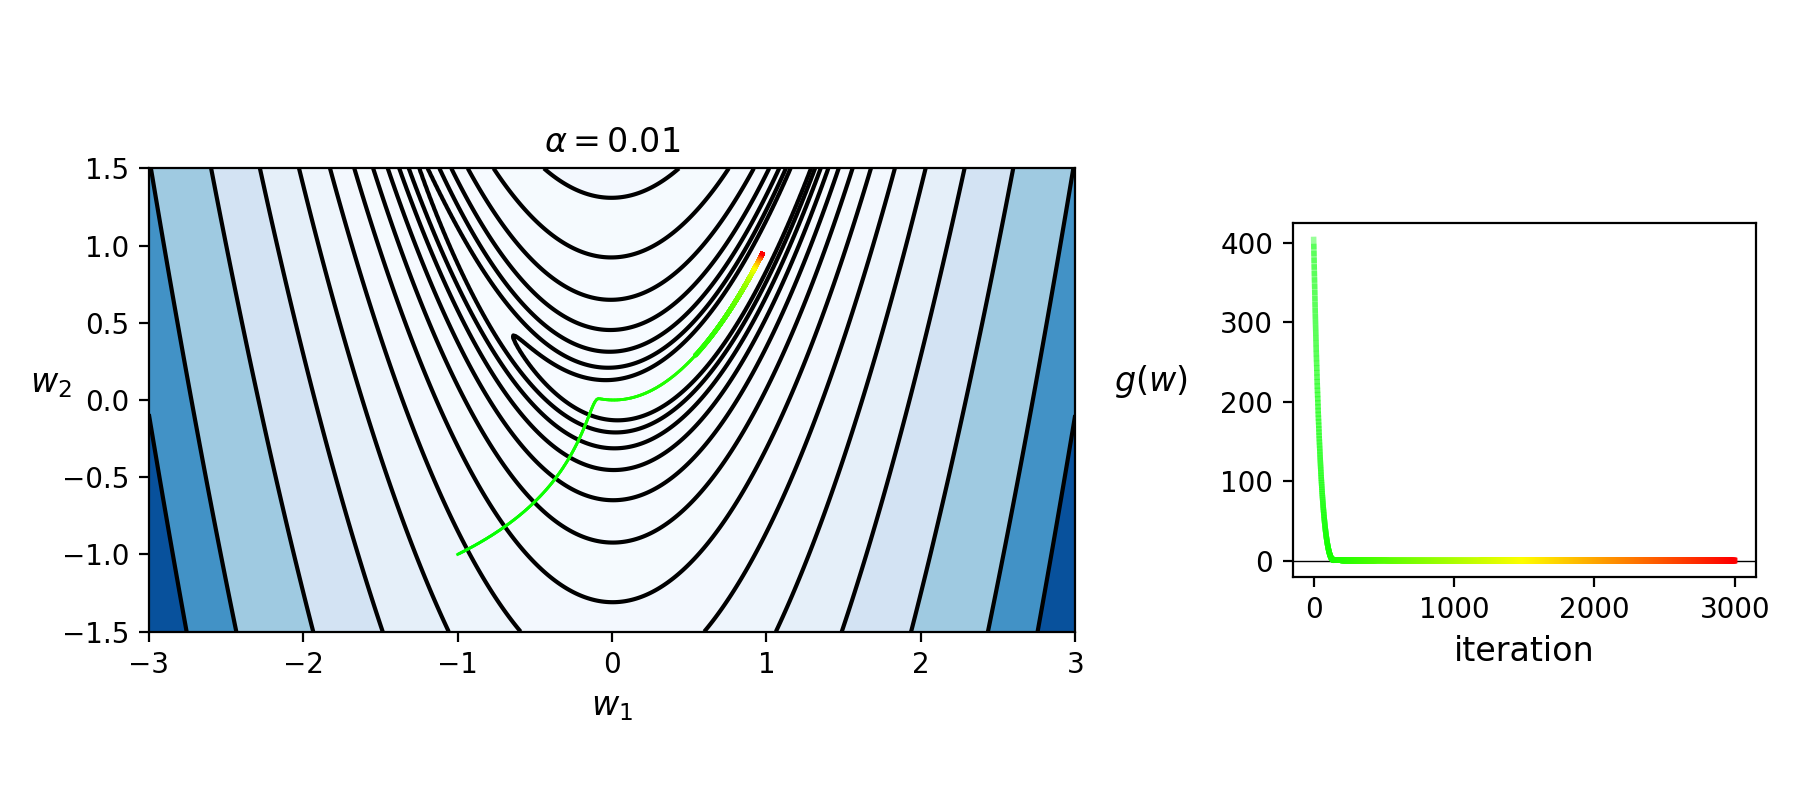

In [19]:
# the Rosenbrock function
g = lambda w: 100*(w[1]-w[0]**2)**2 + (w[0]-1)**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = [-1,-1]; max_its = 3000; steplength_vals = [0.01]; version = 'normalized';

demo.run(g,w_init,steplength_vals,max_its,version = version,num_contours = 38,linewidth = 1,xmin = -3, xmax = 3, ymin = -1.5, ymax = 1.5)

<IPython.core.display.Javascript object>


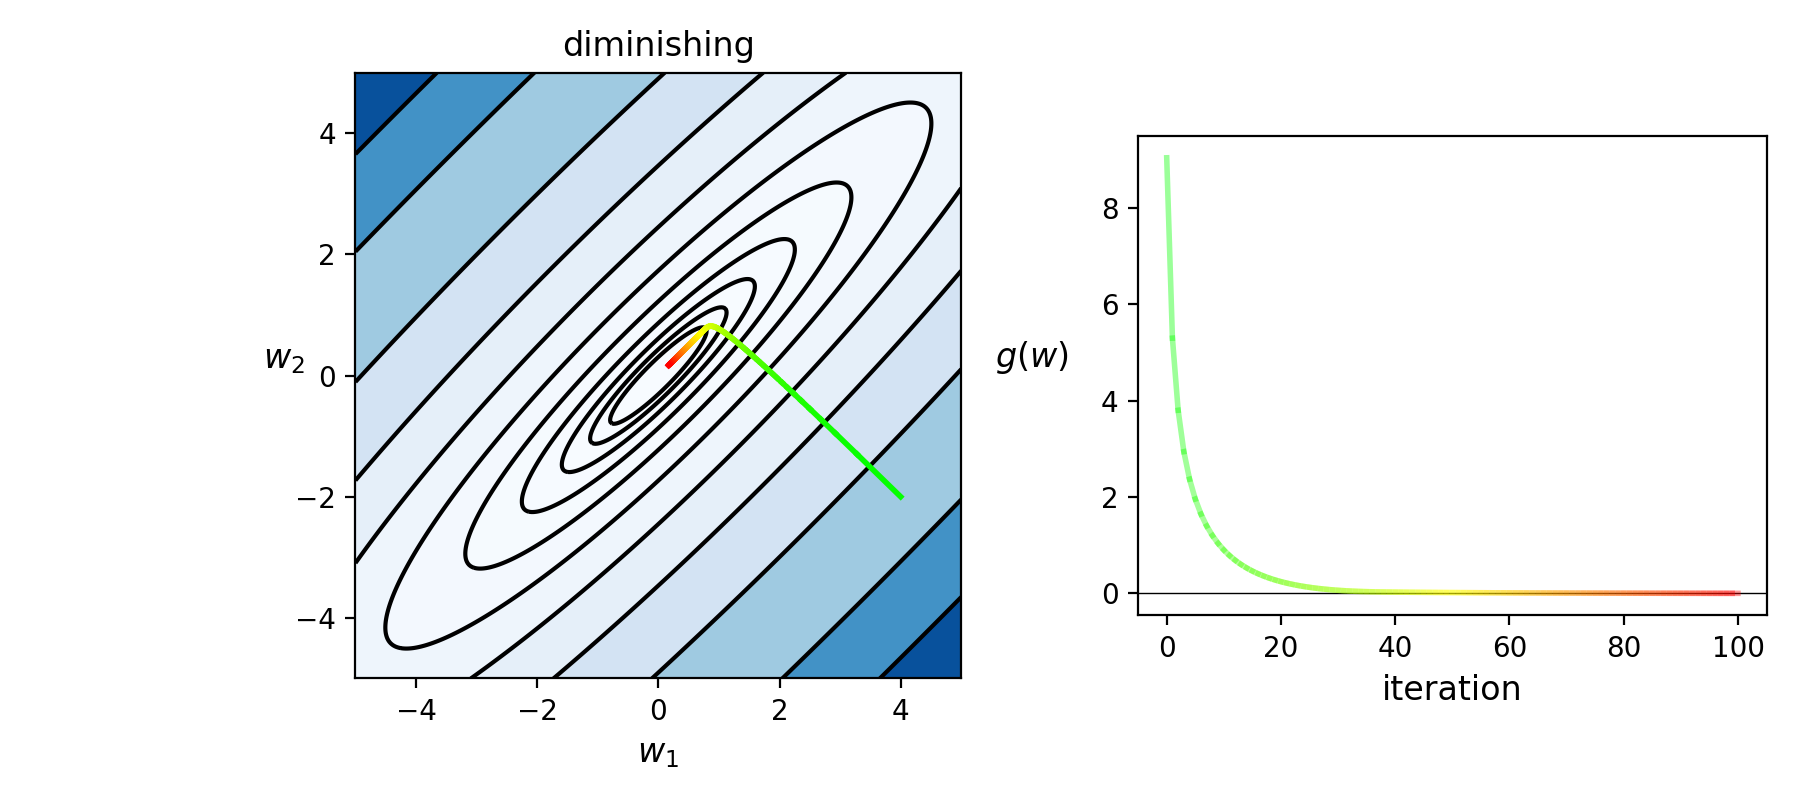

<IPython.core.display.Javascript object>


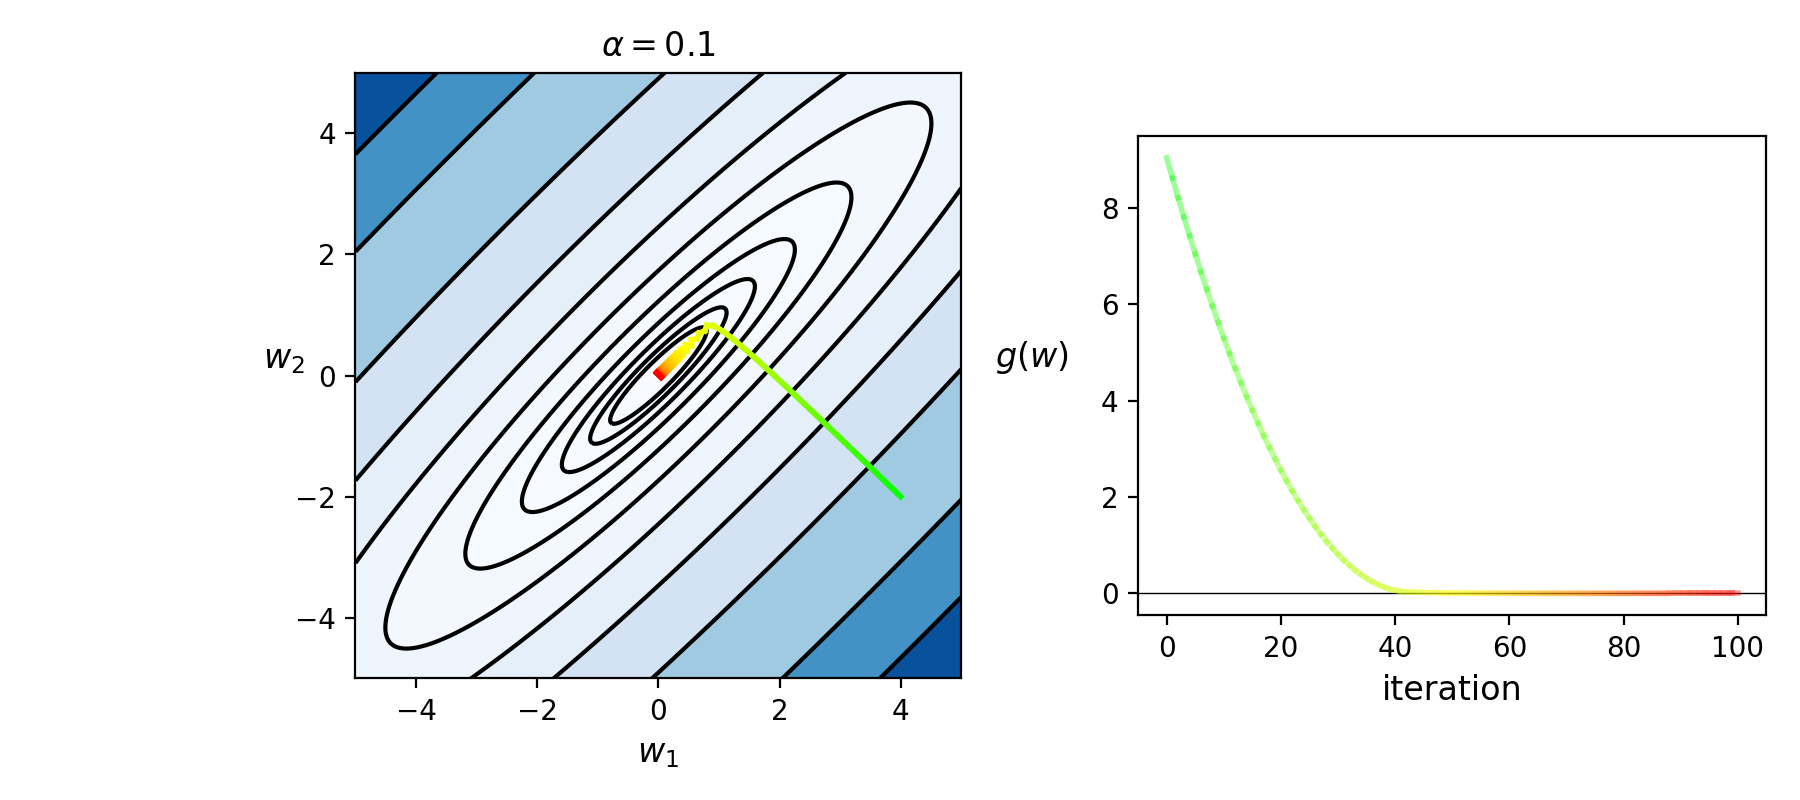

In [23]:
# the Rastrigin function
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = [4,-2]; max_its = 100; steplength_vals = ['diminishing',0.1]; version = 'normalized';

demo.run(g,w_init,steplength_vals,max_its,version = version,num_contours = 30,linewidth = 2,xmin = -5, xmax = 5, ymin = -5, ymax = 5)

# Comparing L1, L2, and Linf normalized steps

<IPython.core.display.Javascript object>


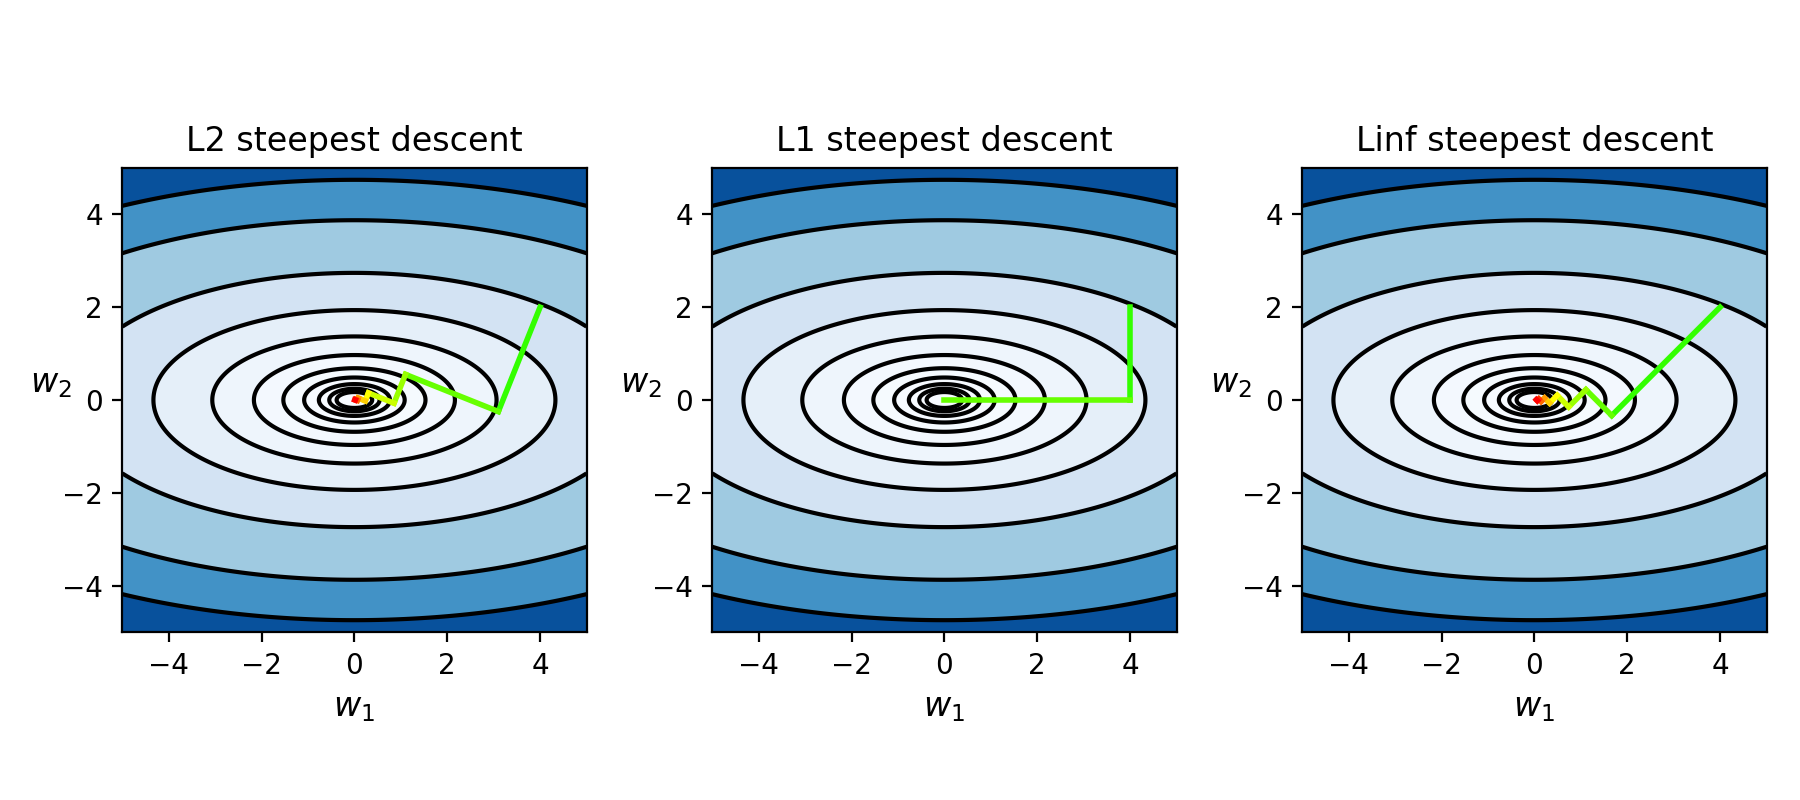

In [54]:
# the Rastrigin function
g = lambda w: w[0]**2 + 5*w[1]**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.steepest_descent_comparison.visualizer();
w_init = [4,2]; max_its = 10; steplength = 'exact'; version = 'L2';

demo.run(g,w_init,steplength,max_its,version = version,num_contours = 30,linewidth = 2,xmin = -5, xmax = 5, ymin = -5, ymax = 5)

<IPython.core.display.Javascript object>


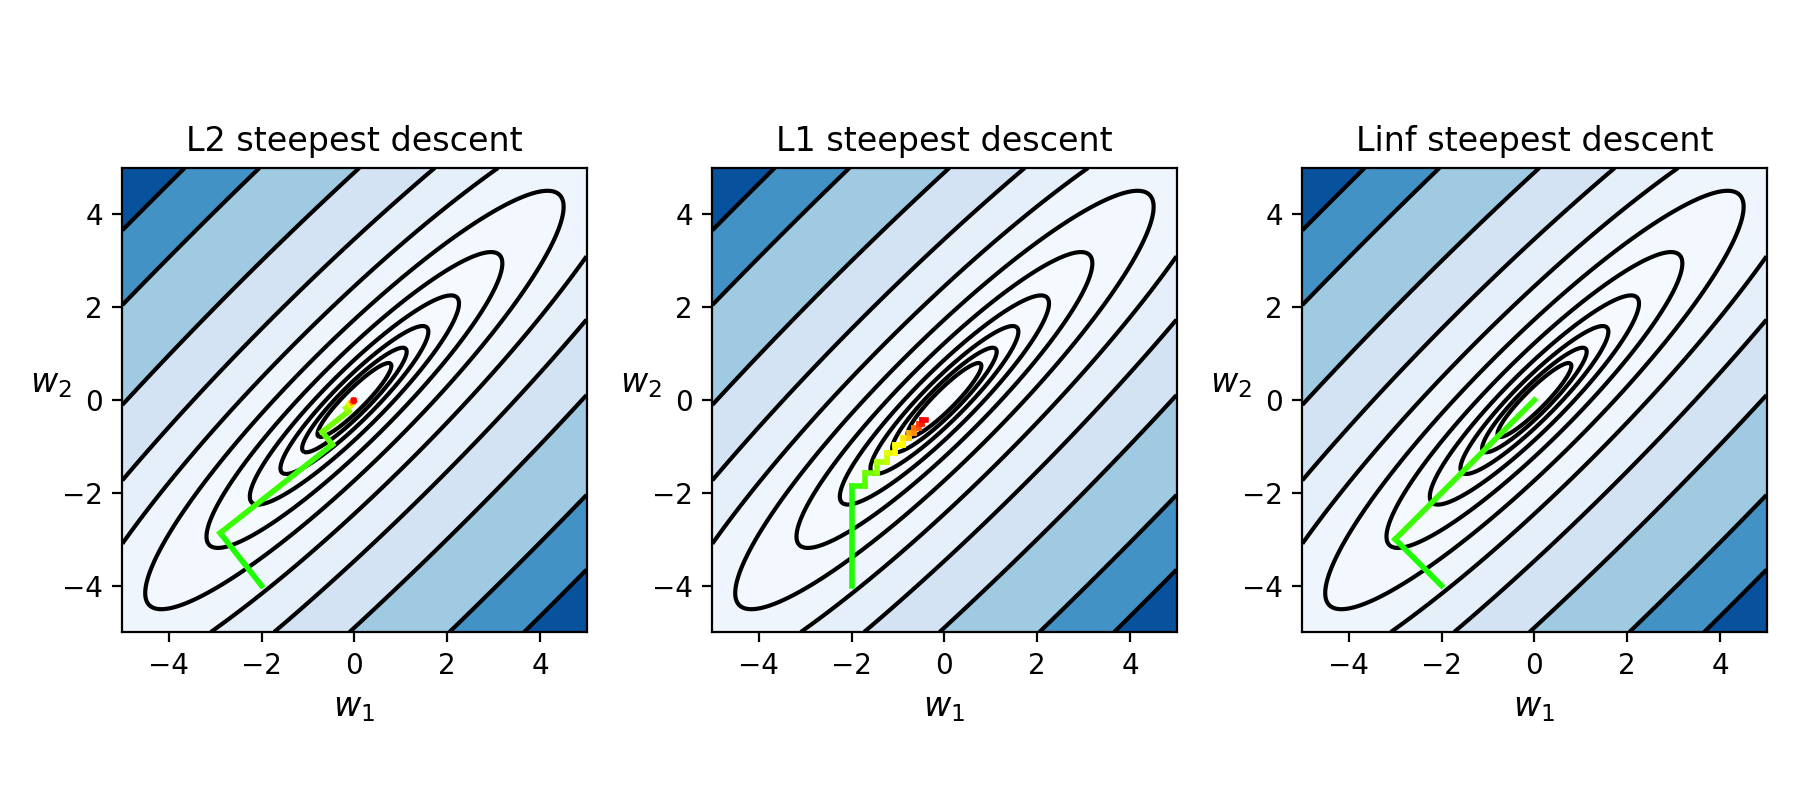

In [51]:
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]


# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.steepest_descent_comparison.visualizer();
w_init = [-2,-4]; max_its = 20; steplength = 'exact'; version = 'L2';

demo.run(g,w_init,steplength,max_its,version = version,num_contours = 30,linewidth = 2,xmin = -5, xmax = 5, ymin = -5, ymax = 5)

<IPython.core.display.Javascript object>


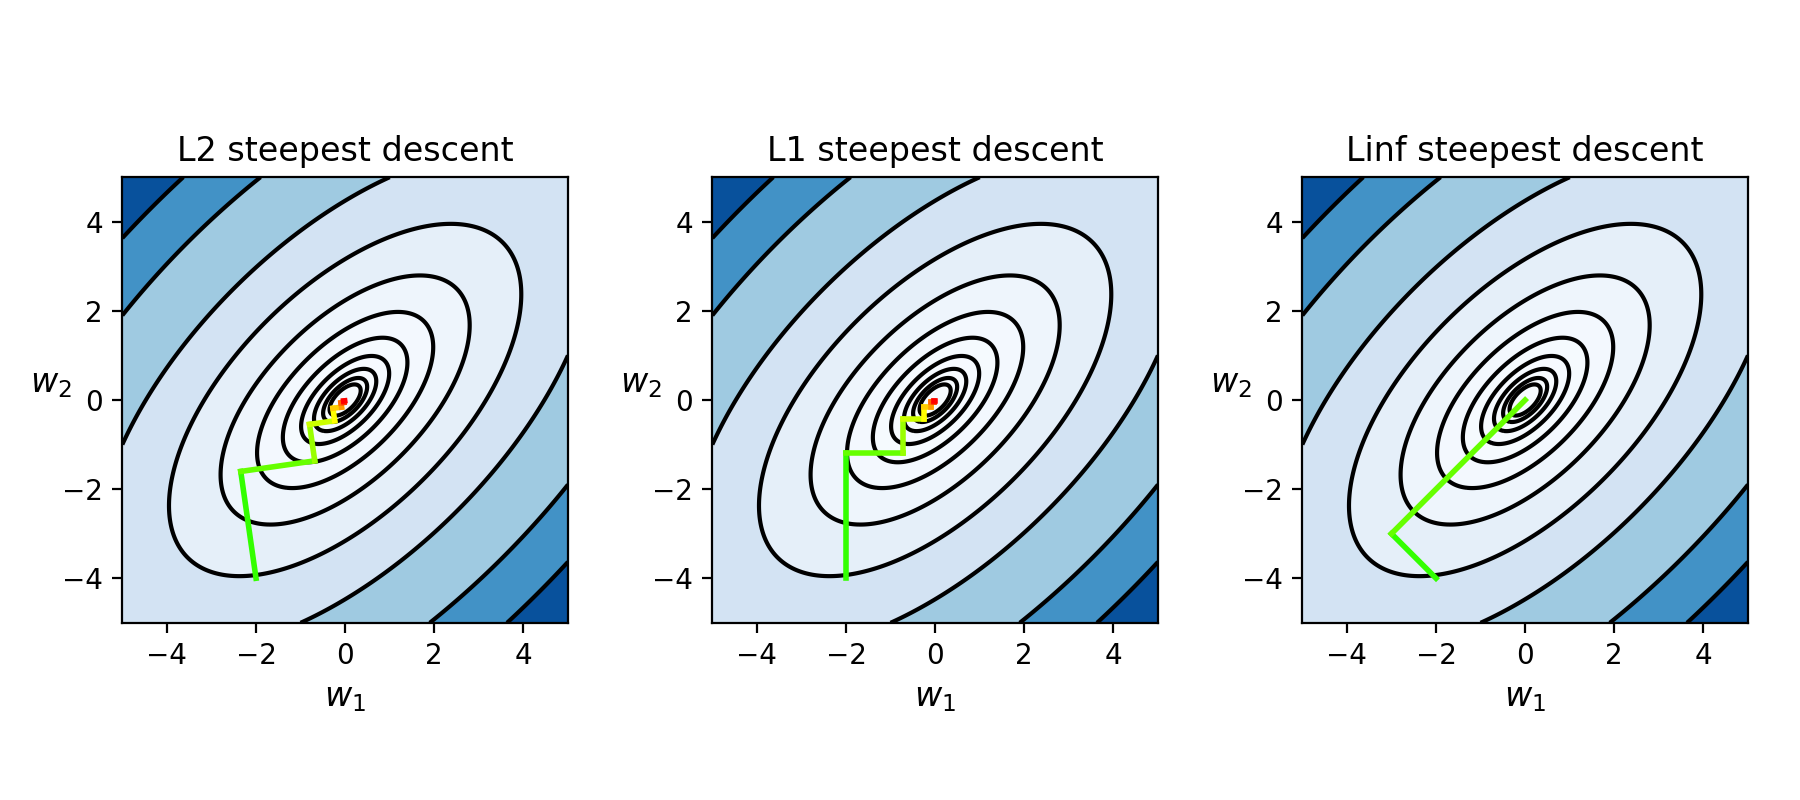

In [31]:
g = lambda w: 5*w[0]**2 + 5*w[1]**2 - 6*w[0]*w[1]

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.steepest_descent_comparison.visualizer();
w_init = [-2,-4]; max_its = 10; steplength = 'exact'; version = 'L2';

demo.run(g,w_init,steplength,max_its,version = version,num_contours = 30,linewidth = 2,xmin = -5, xmax = 5, ymin = -5, ymax = 5)

<IPython.core.display.Javascript object>


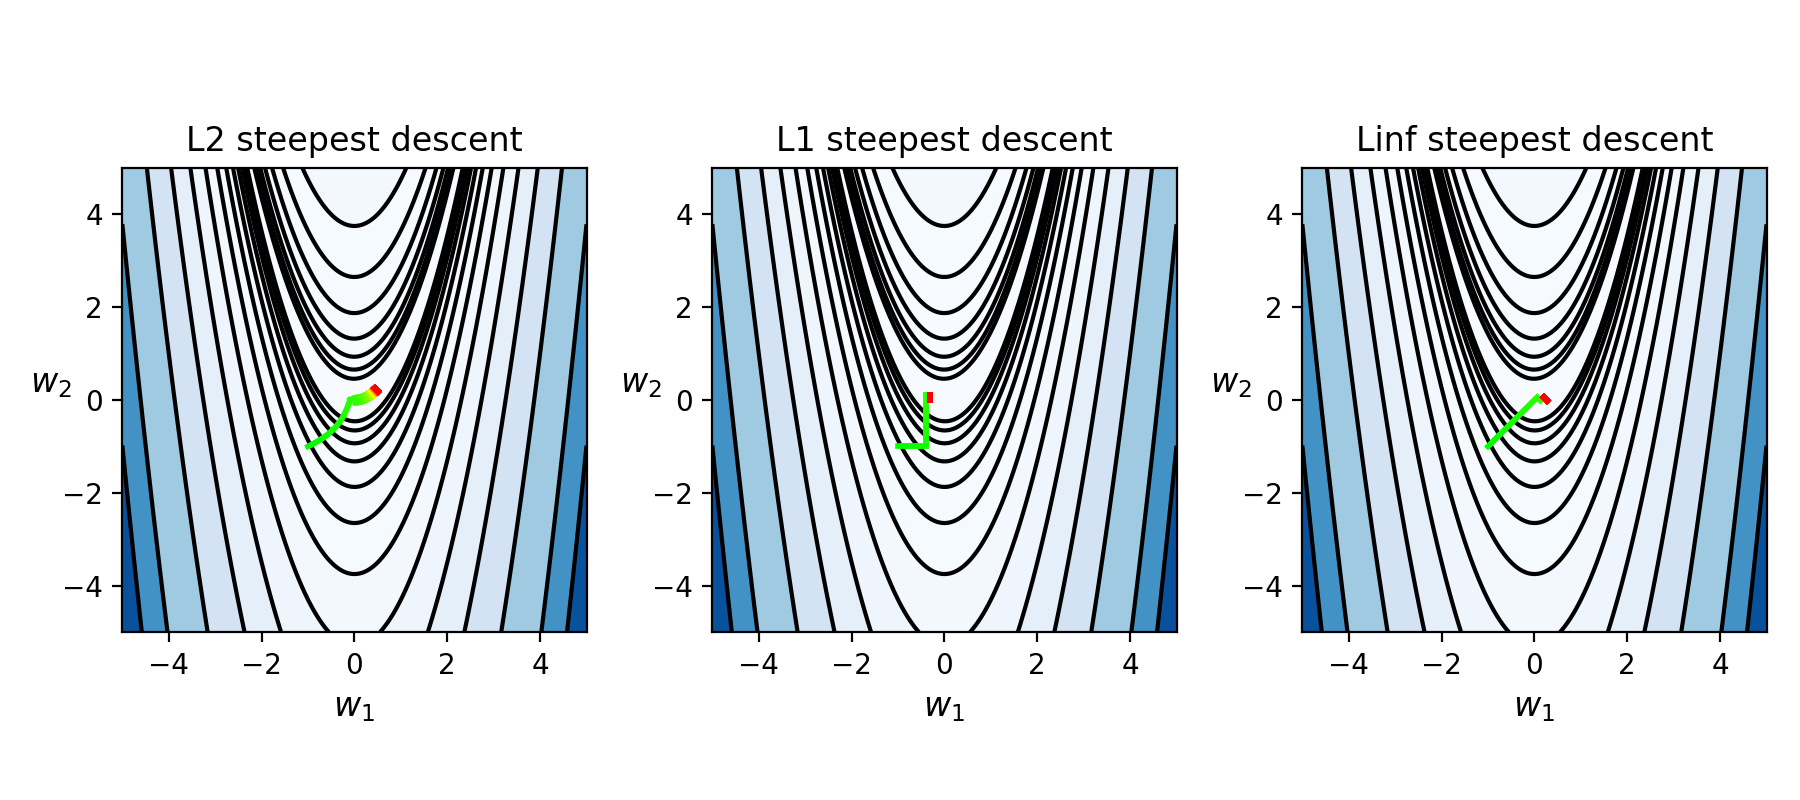

In [58]:
# the Rosenbrock function
g = lambda w: 100*(w[1]-w[0]**2)**2 + (w[0]-1)**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.steepest_descent_comparison.visualizer();
w_init = [-1,-1]; max_its = 200; steplength = 0.1; version = 'L2';

demo.run(g,w_init,steplength,max_its,version = version,num_contours = 38,linewidth = 2,xmin = -5, xmax = 5, ymin = -5, ymax = 5)

# Coordinate gradient descent

<IPython.core.display.Javascript object>


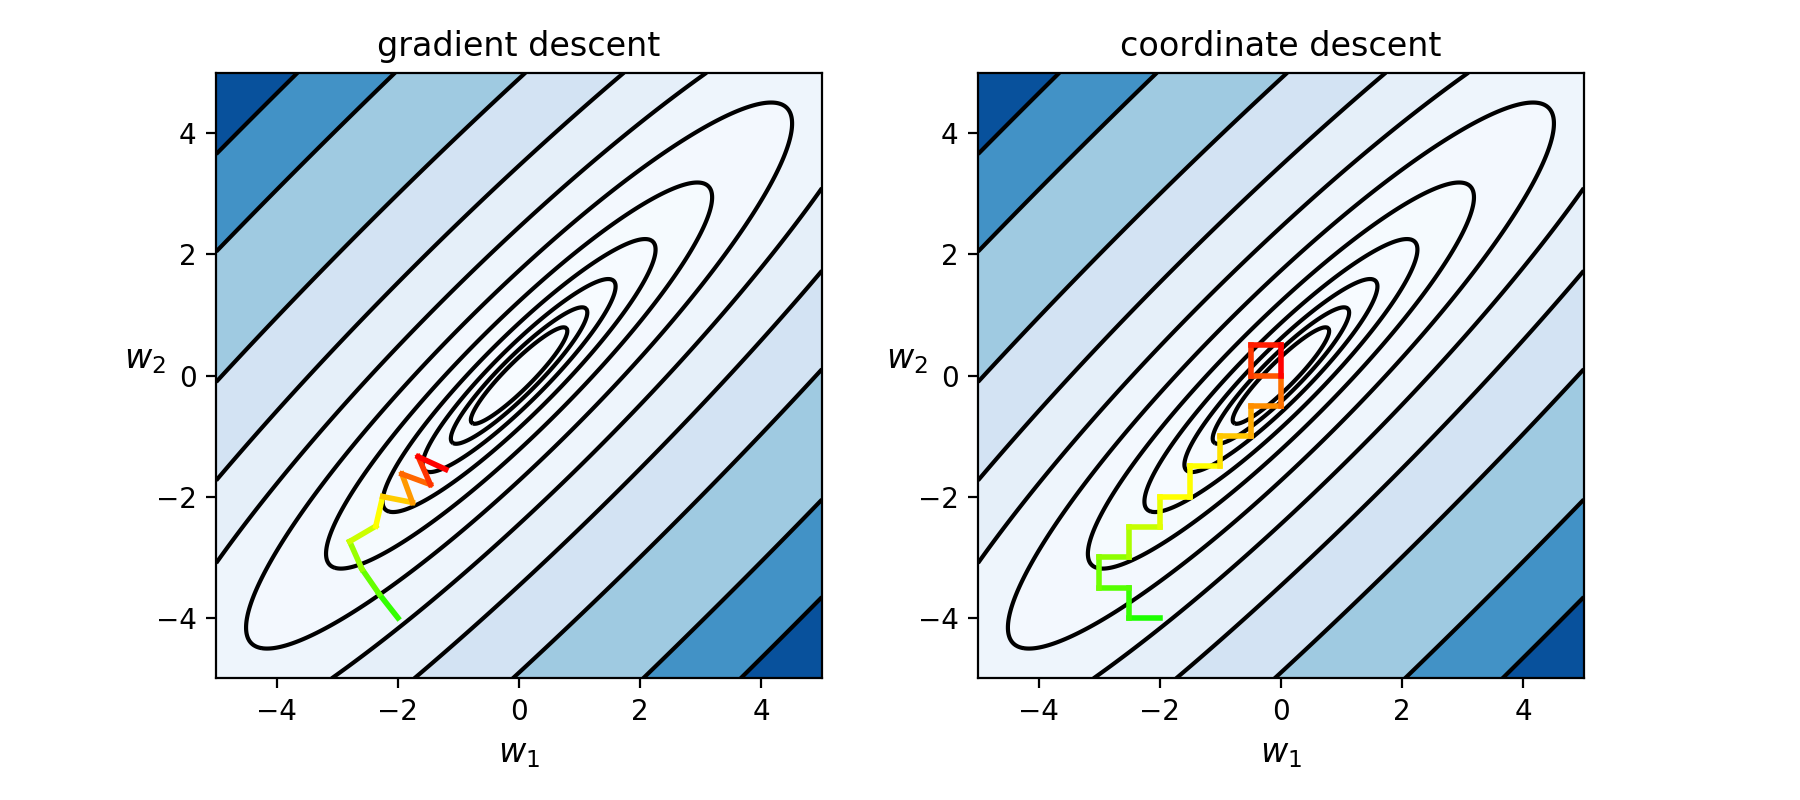

In [14]:
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.coordinate_gradient_descent.visualizer();
w_init = [-2,-4]; max_its = 10; steplength = 0.5; version = 'normalized';

demo.run(g,w_init,steplength,max_its,version = version,num_contours = 30,linewidth = 2,xmin = -5, xmax = 5, ymin = -5, ymax = 5)

<IPython.core.display.Javascript object>


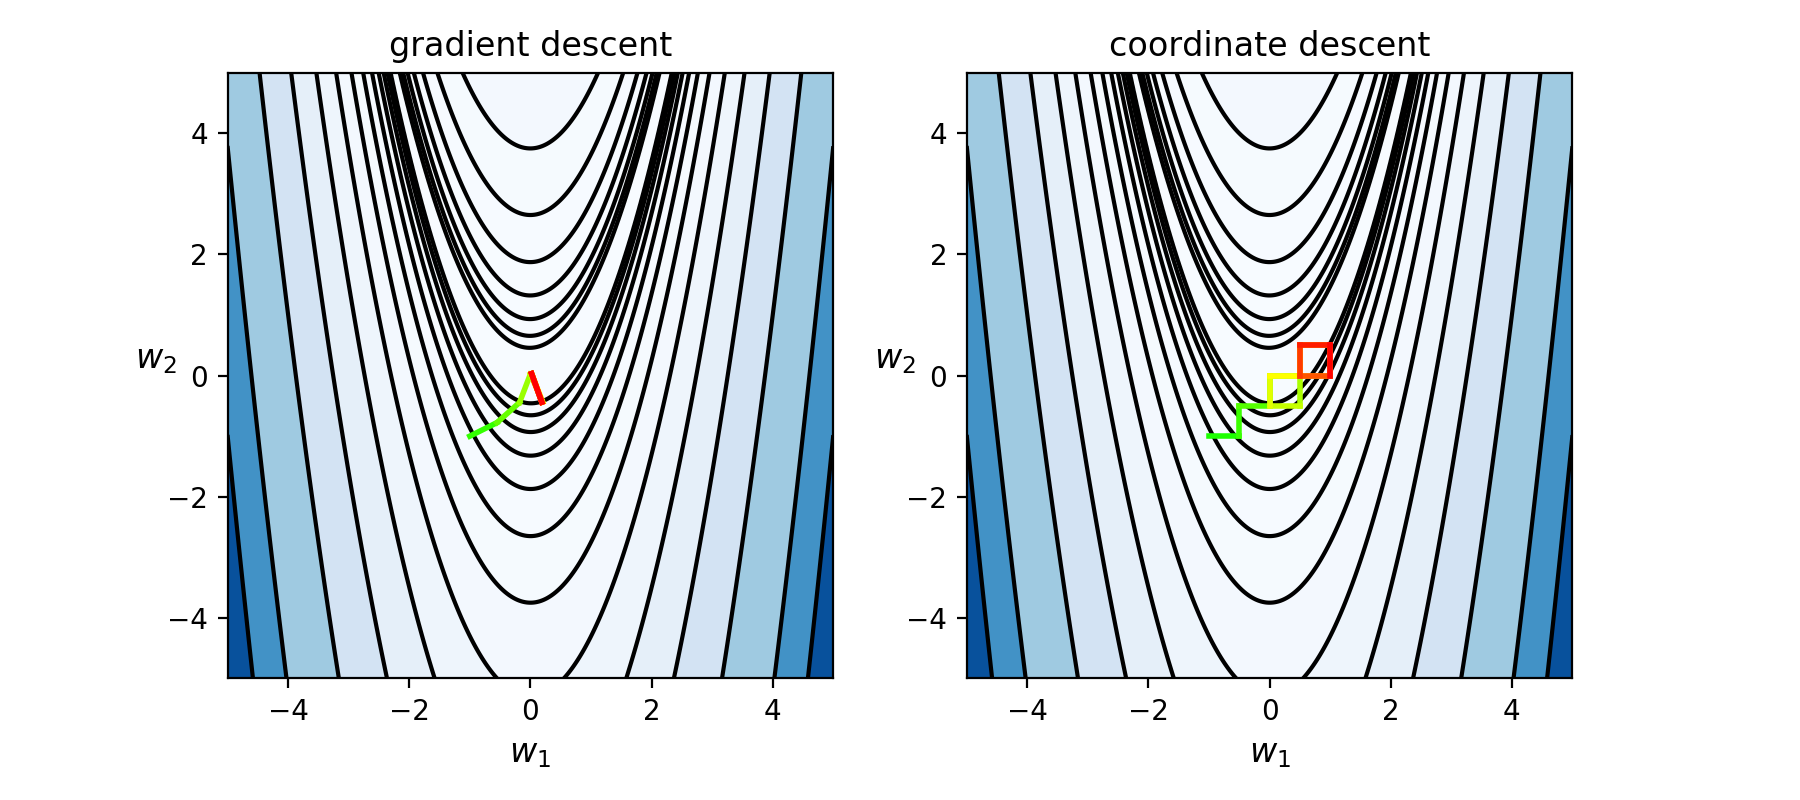

In [9]:
g = lambda w: 100*(w[1]-w[0]**2)**2 + (w[0]-1)**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.coordinate_gradient_descent.visualizer();
w_init = [-1,-1]; max_its = 10; steplength = 0.5; version = 'normalized';

demo.run(g,w_init,steplength,max_its,version = version,num_contours = 38,linewidth = 2,xmin = -5, xmax = 5, ymin = -5, ymax = 5)

<IPython.core.display.Javascript object>


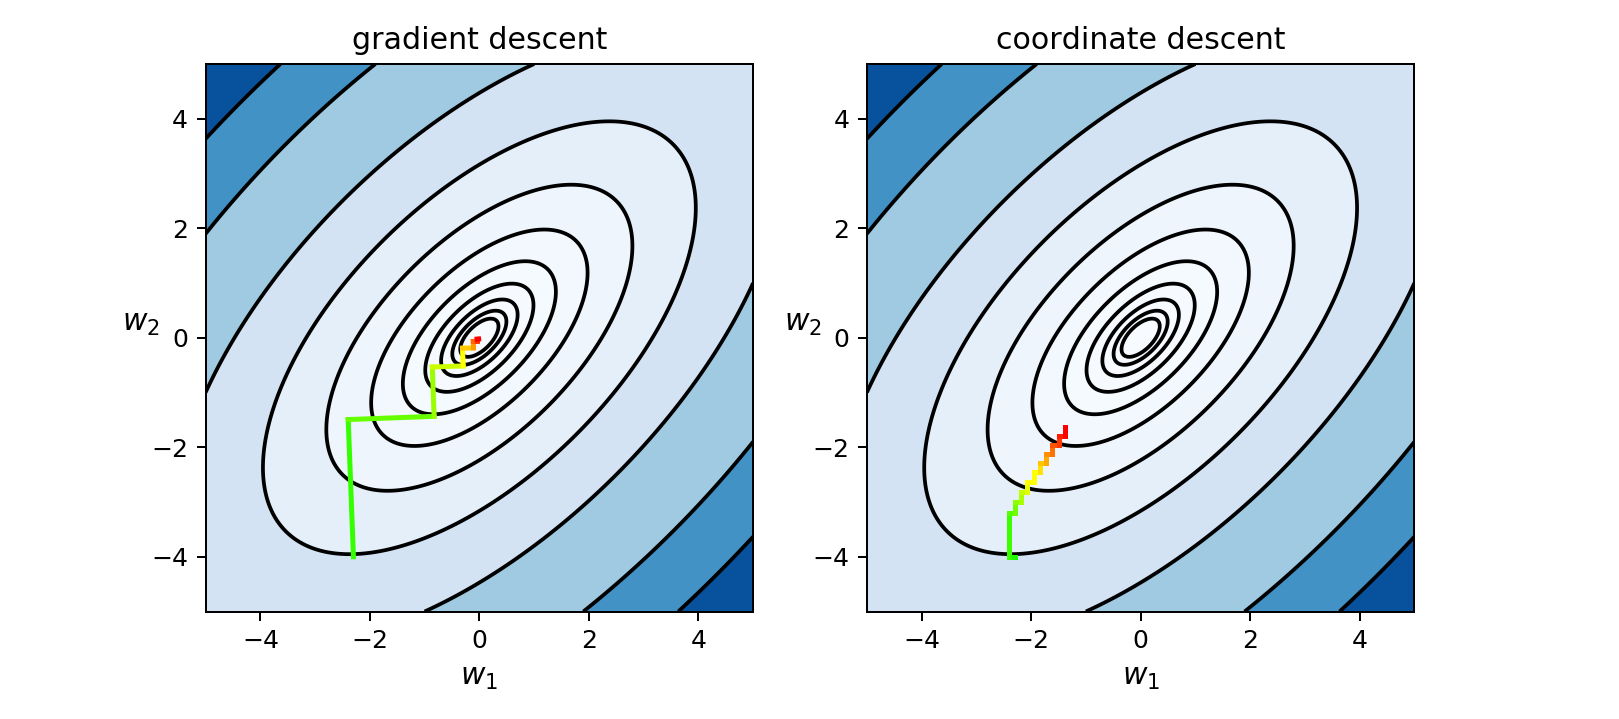

In [9]:
g = lambda w: 5*w[0]**2 + 5*w[1]**2 - 6*w[0]*w[1]

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.coordinate_gradient_descent.visualizer();
w_init = [-2.3,-4]; max_its = 10; steplength = 'exact'; version = 'unnormalized';

demo.run(g,w_init,steplength,max_its,version = version,num_contours = 30,linewidth = 2,xmin = -5, xmax = 5, ymin = -5, ymax = 5)

# Lipschitz majorizer


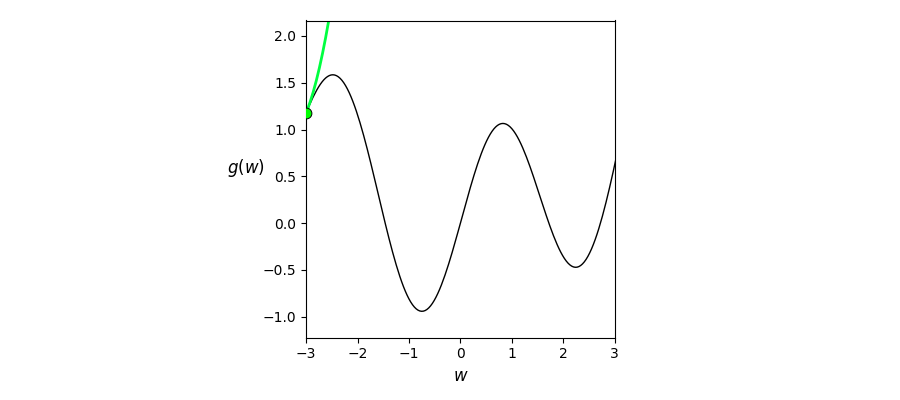
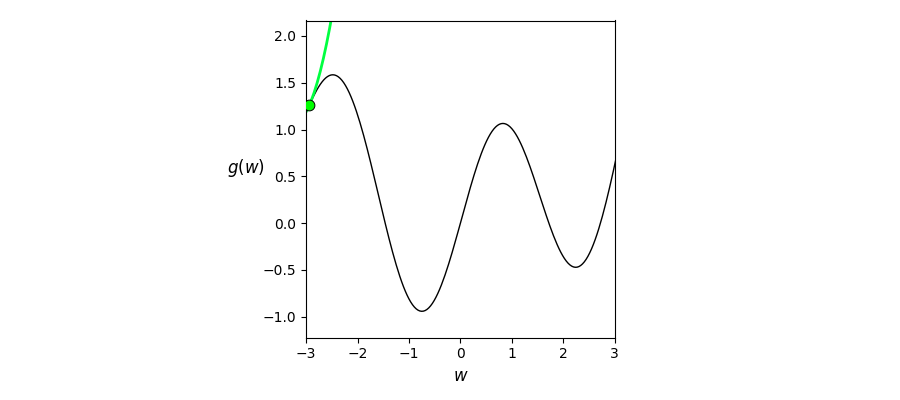
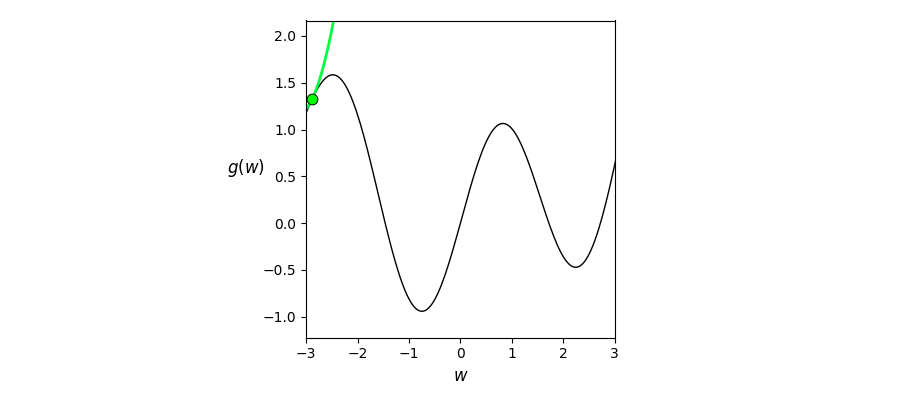
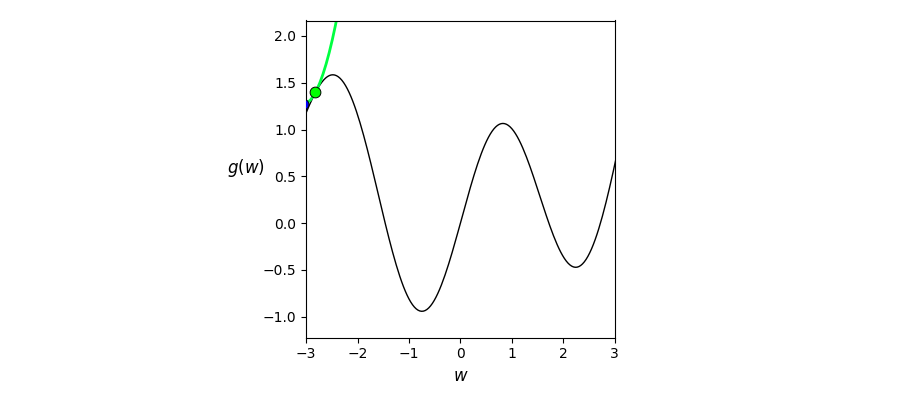
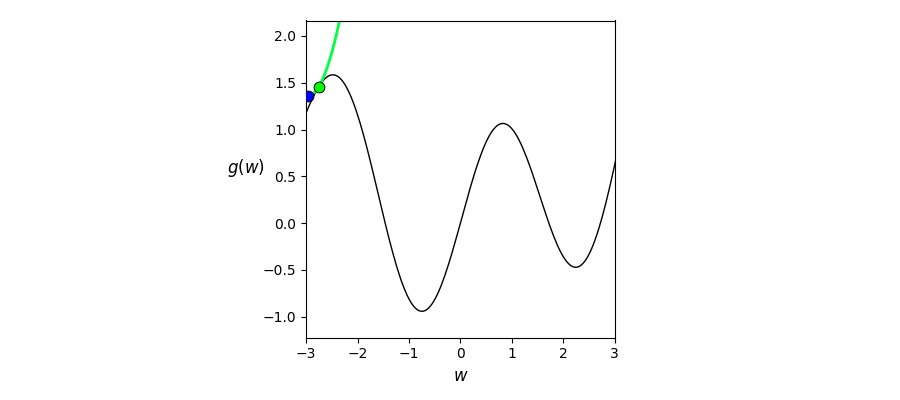
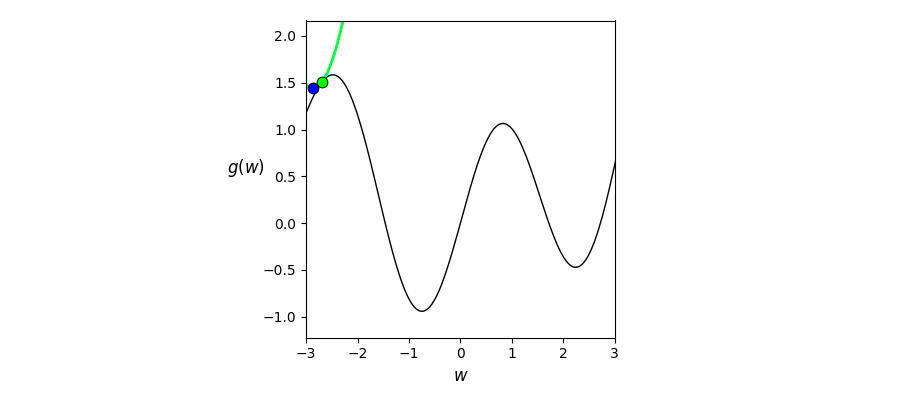
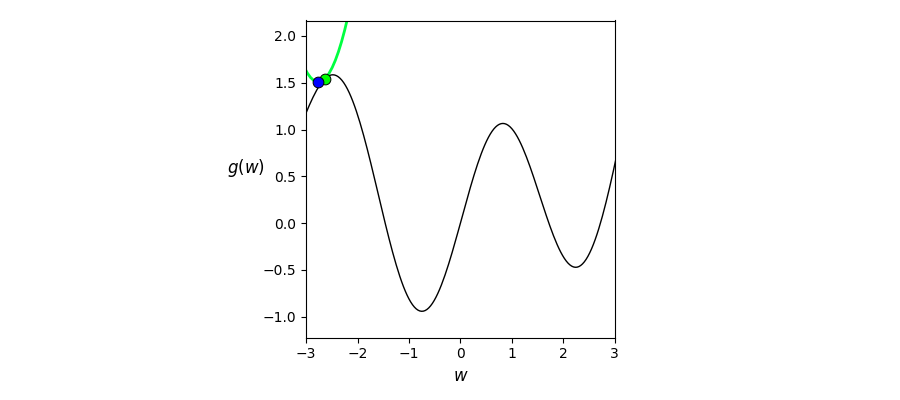
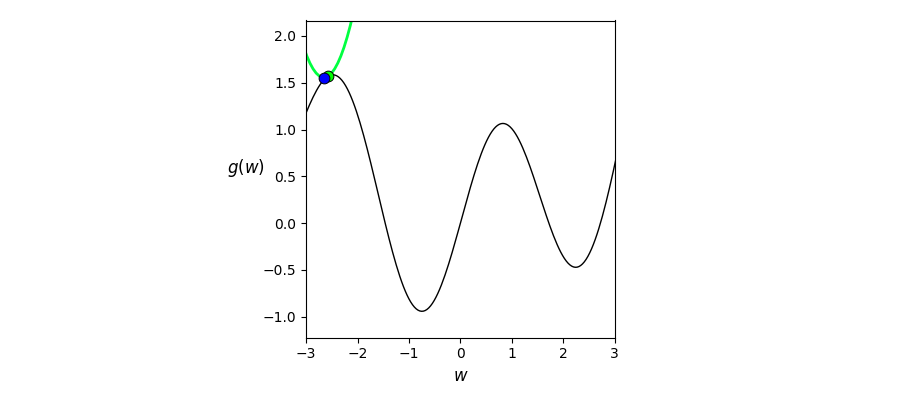
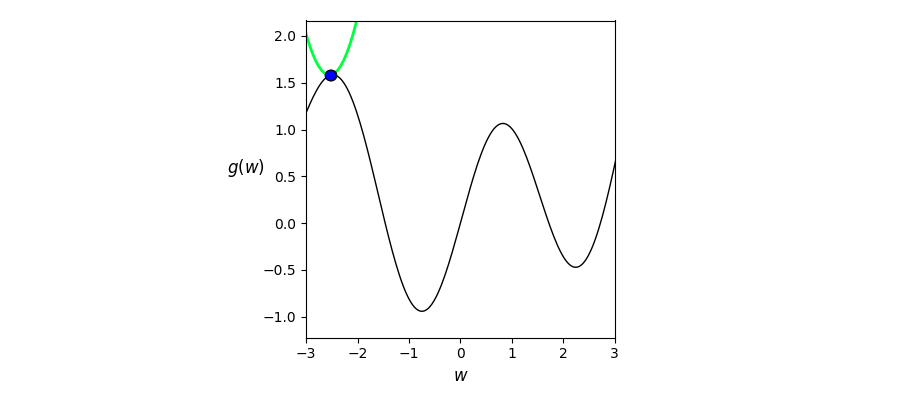
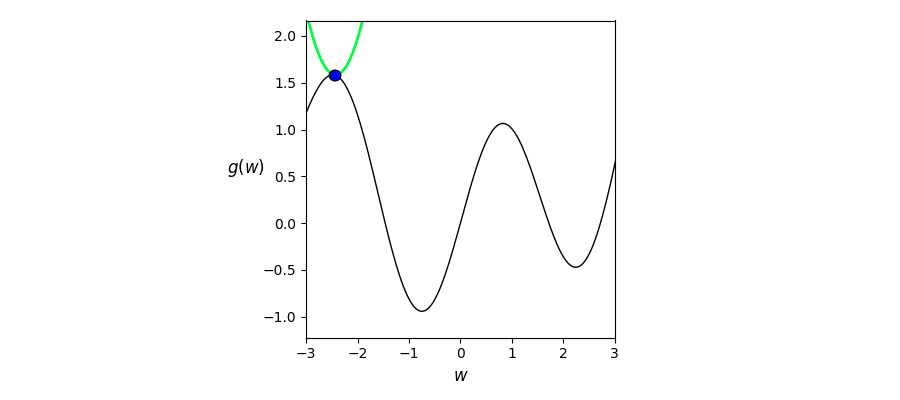
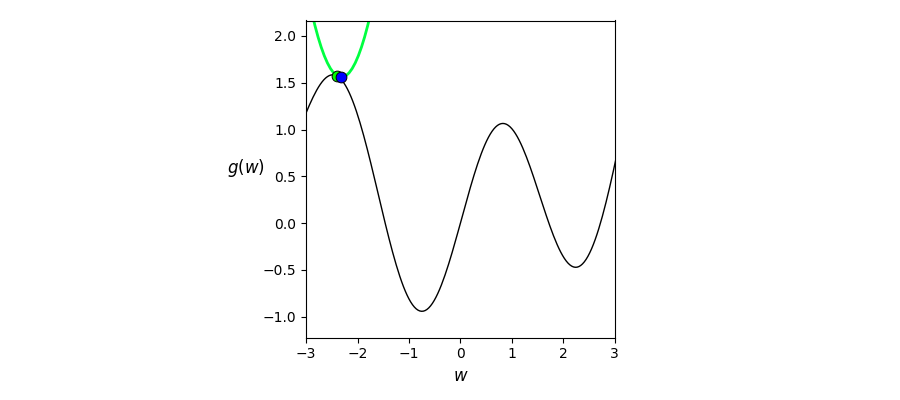
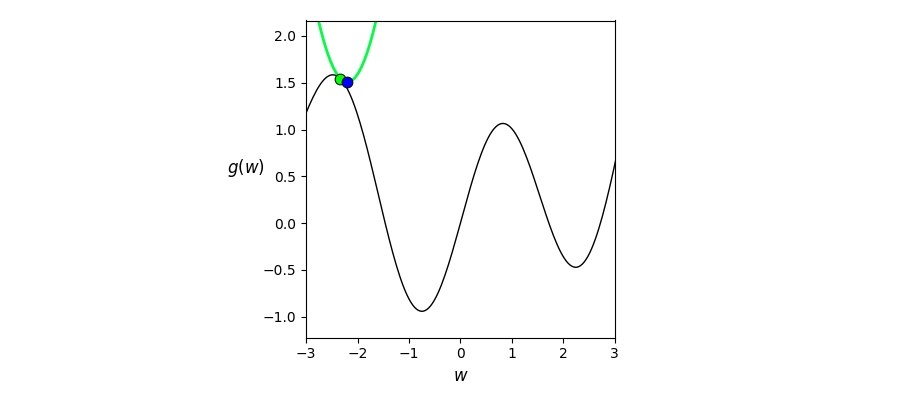
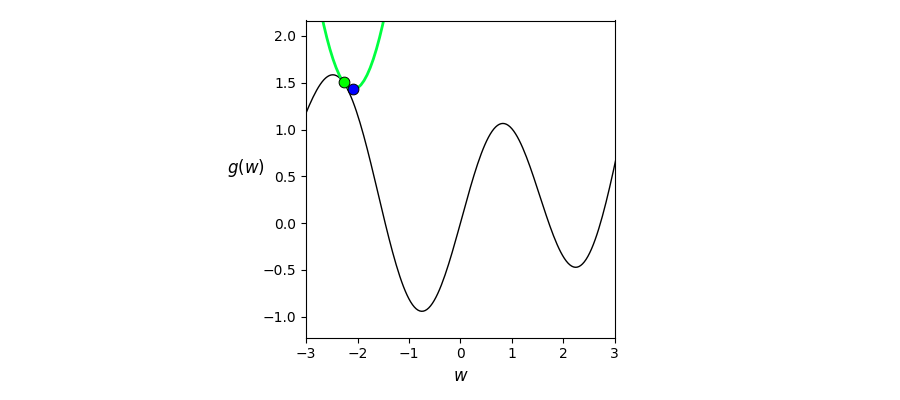
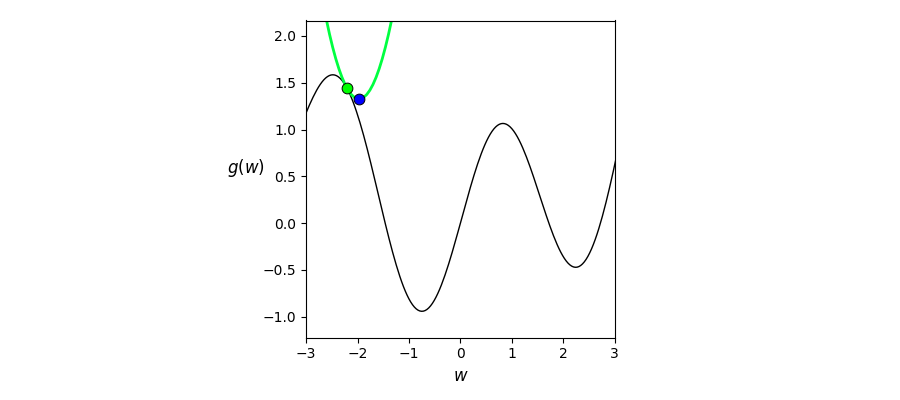
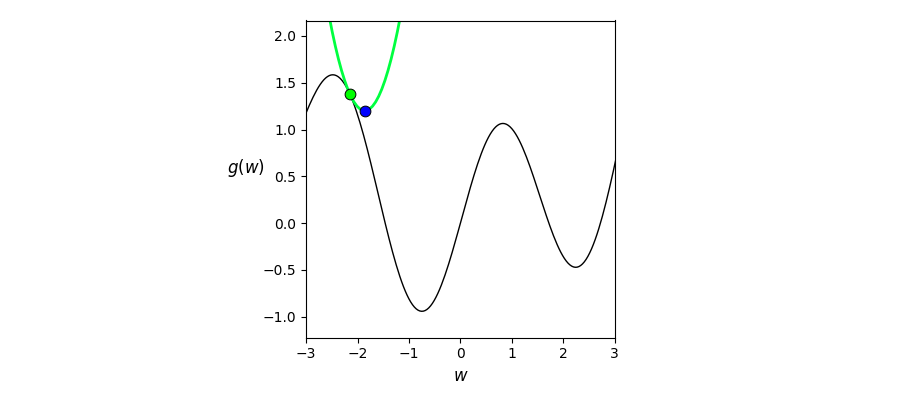
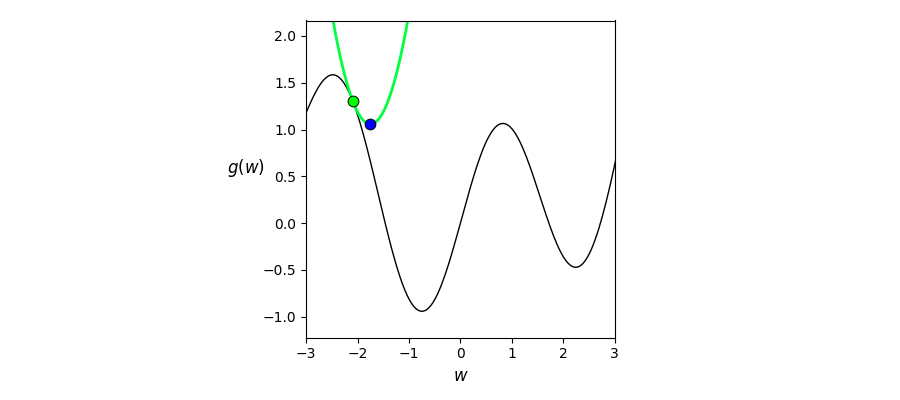
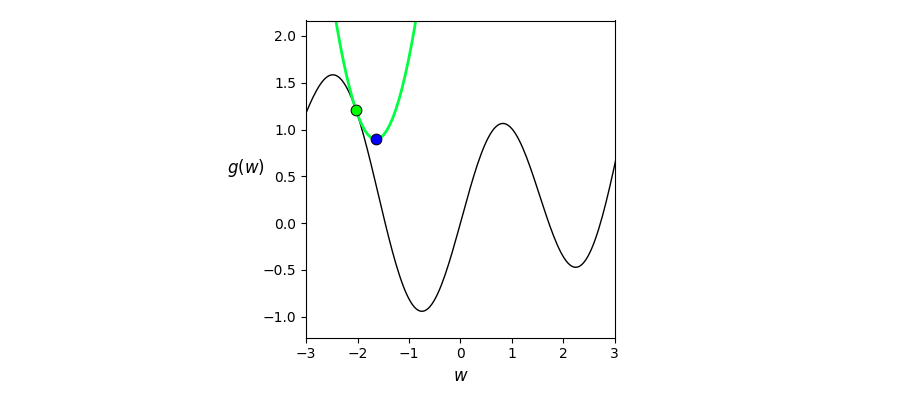
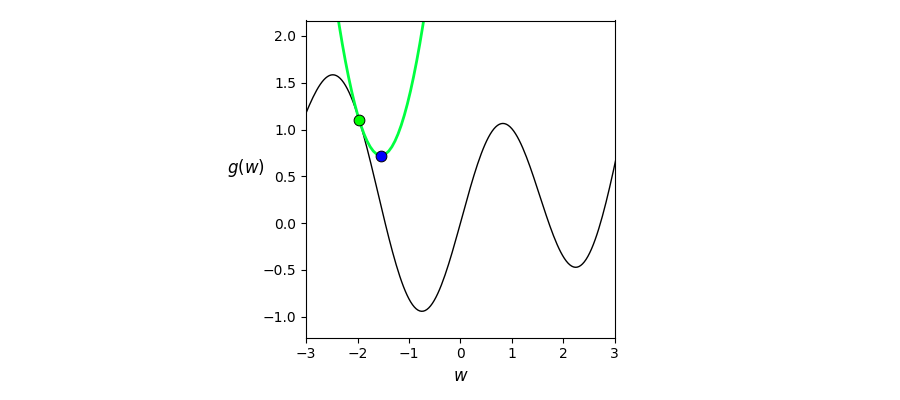
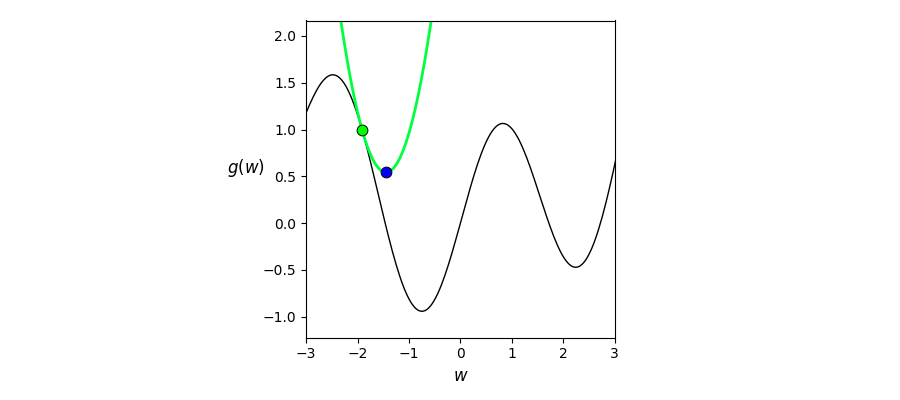
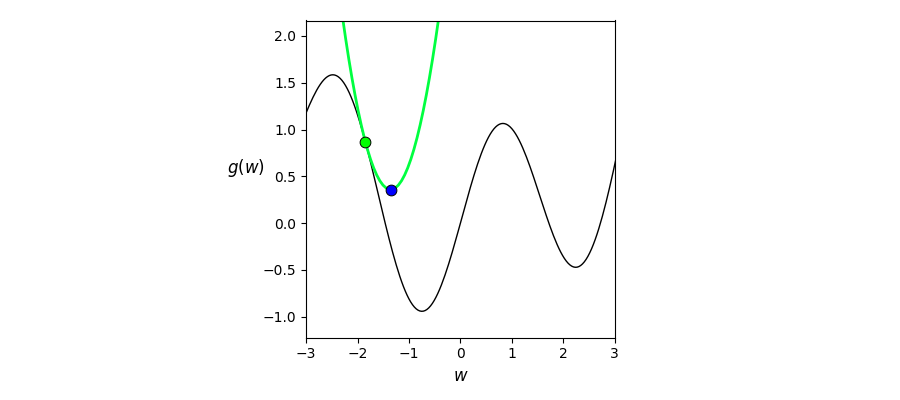
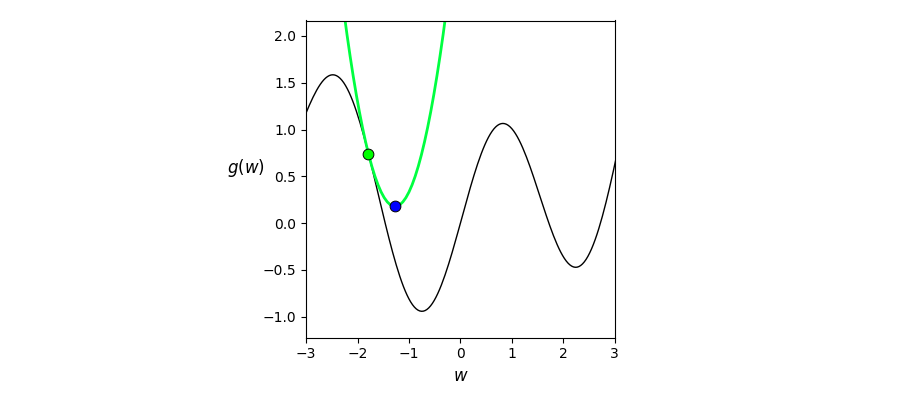
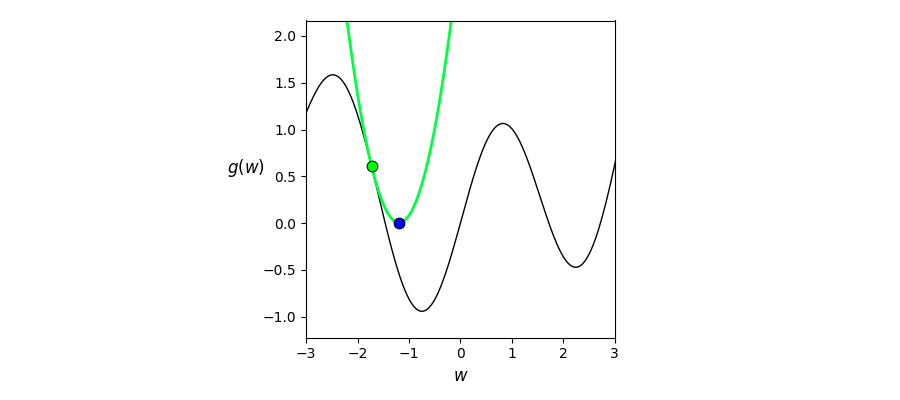
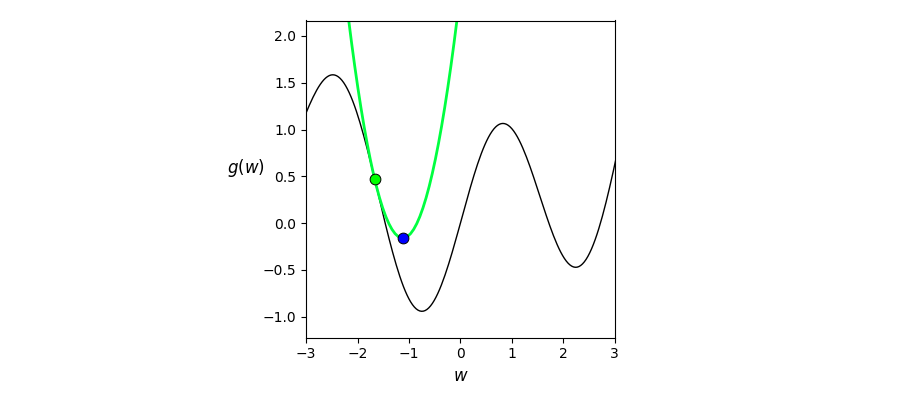
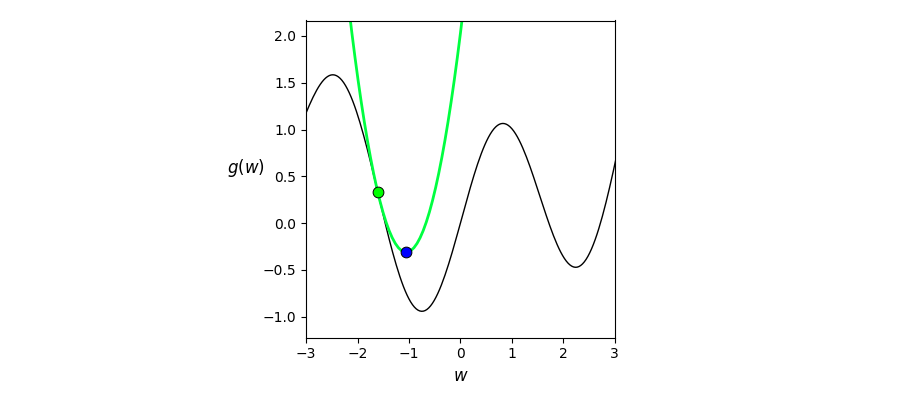
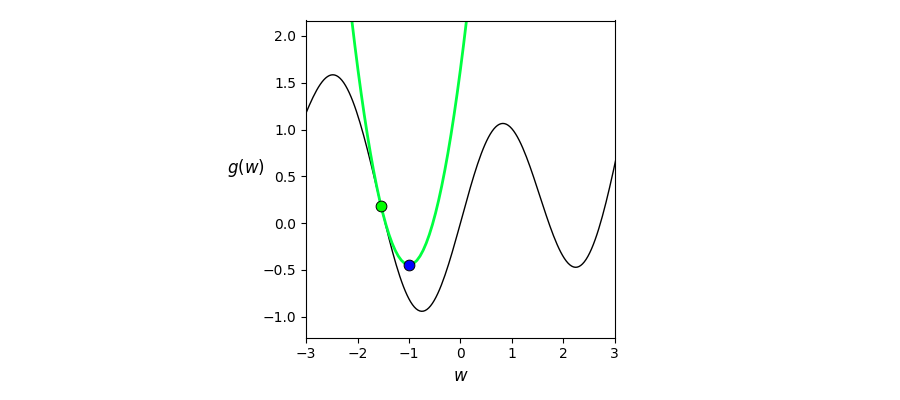
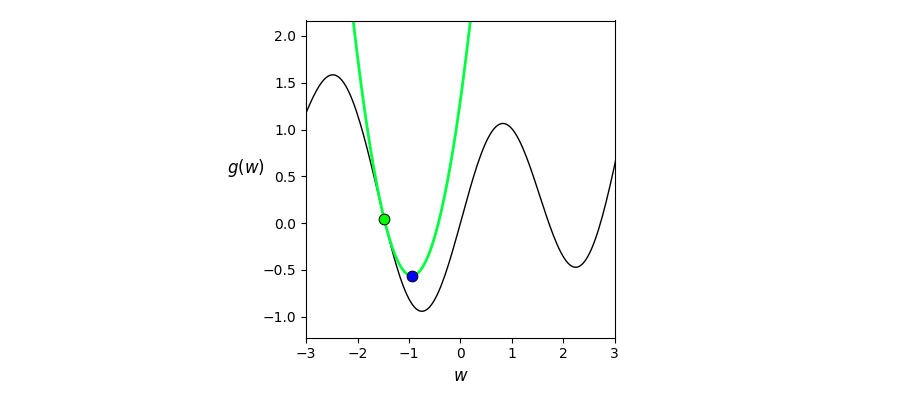
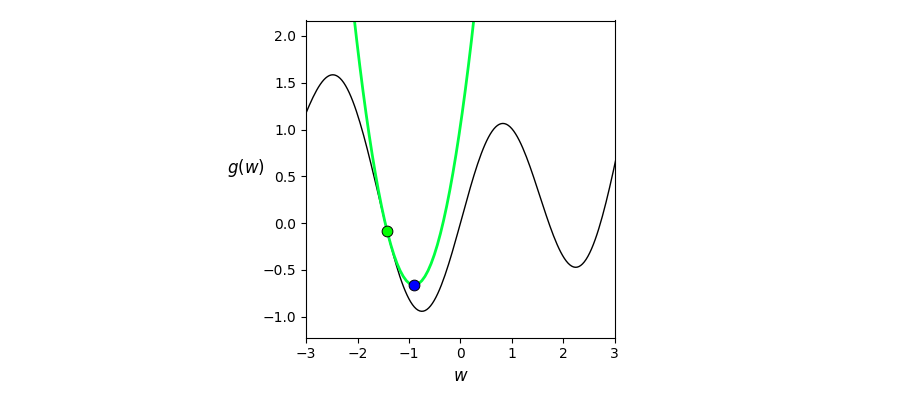
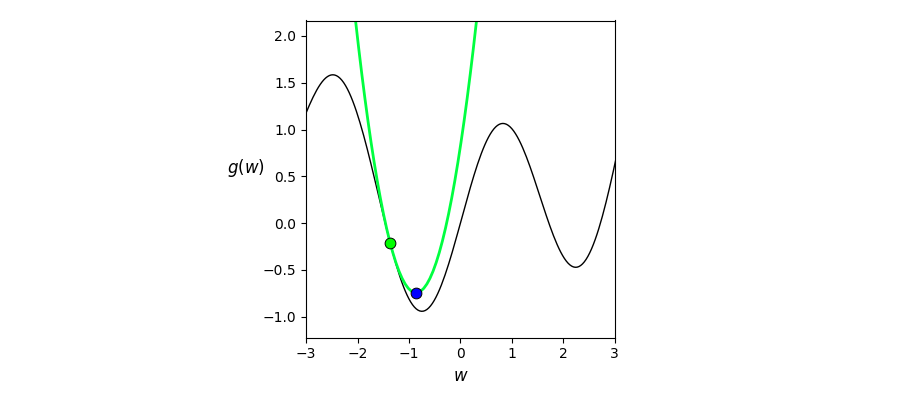
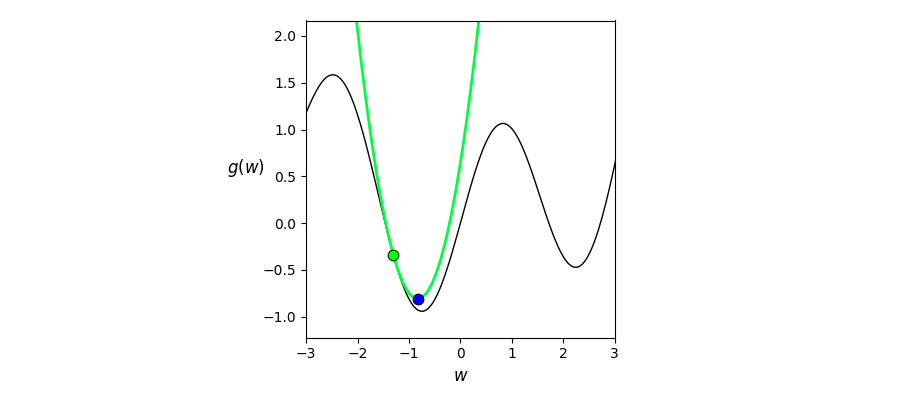
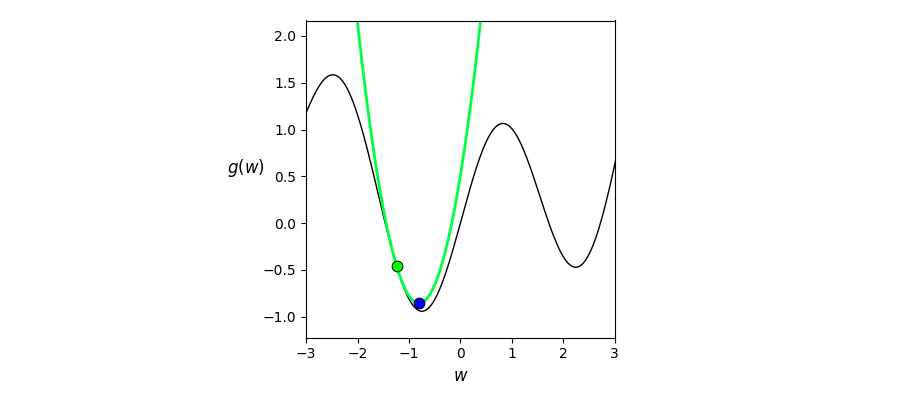
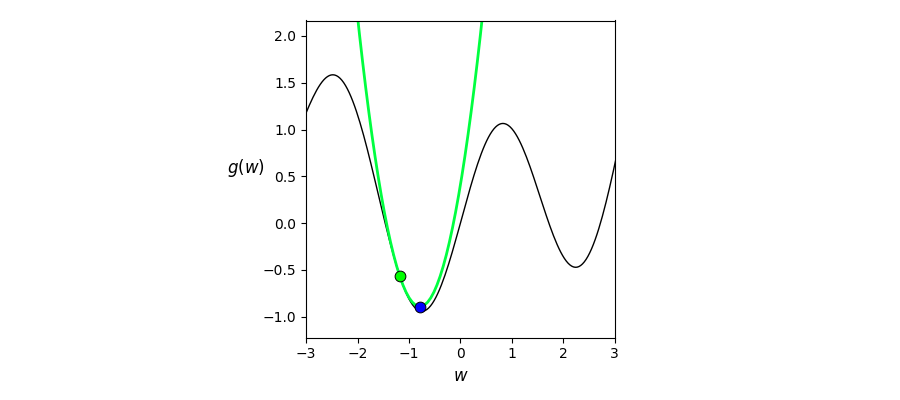
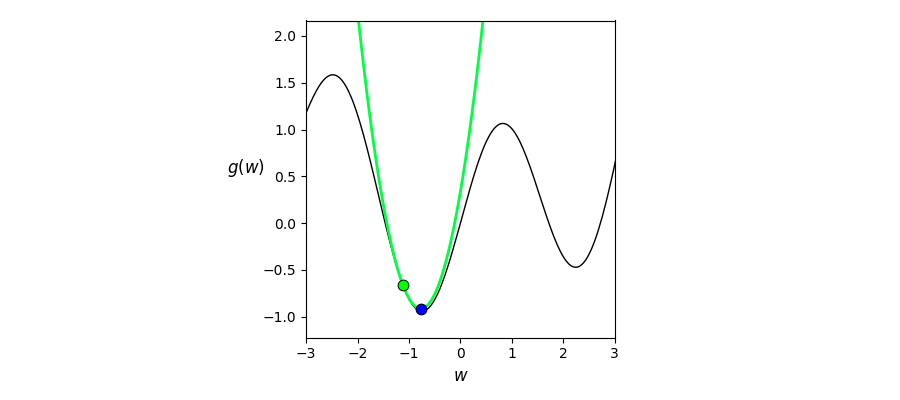
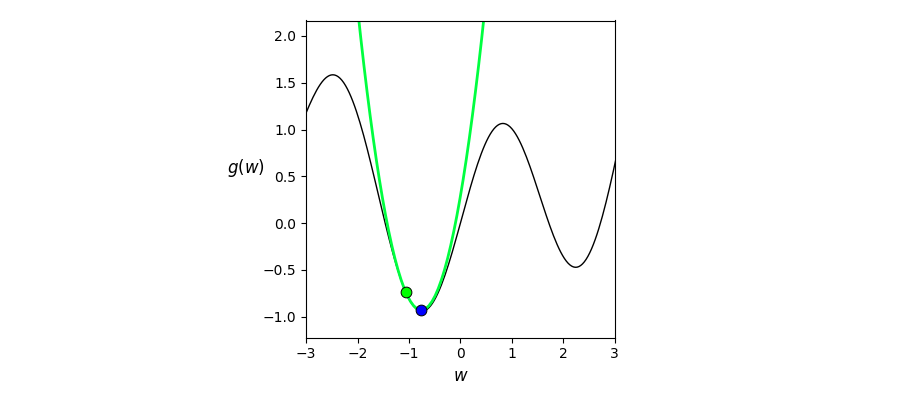
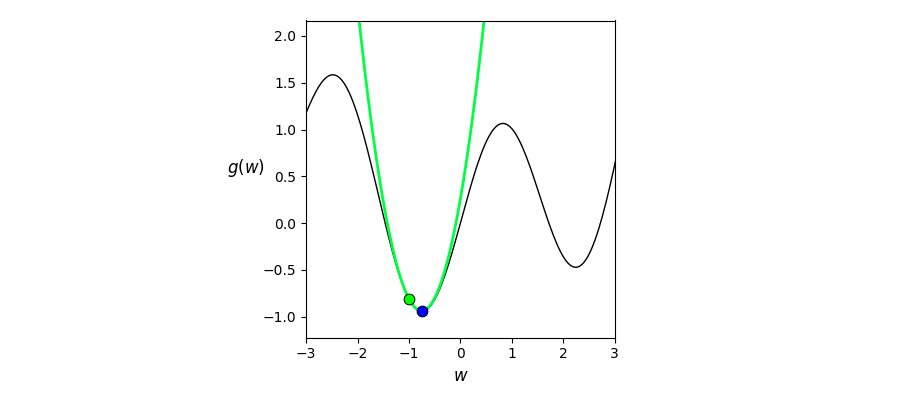
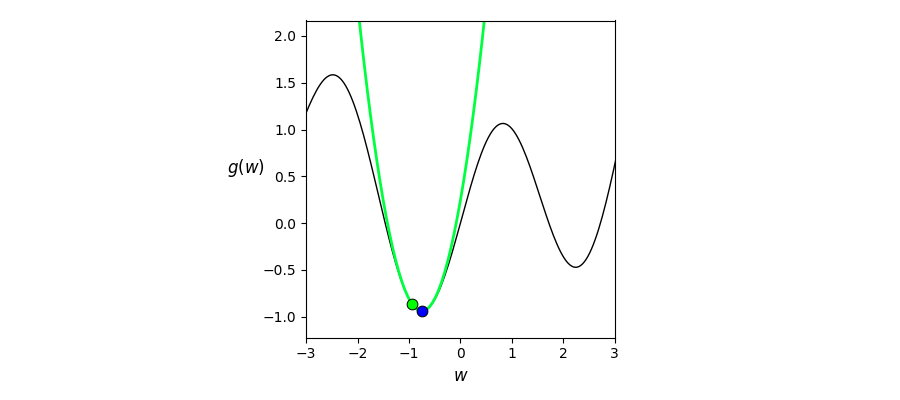
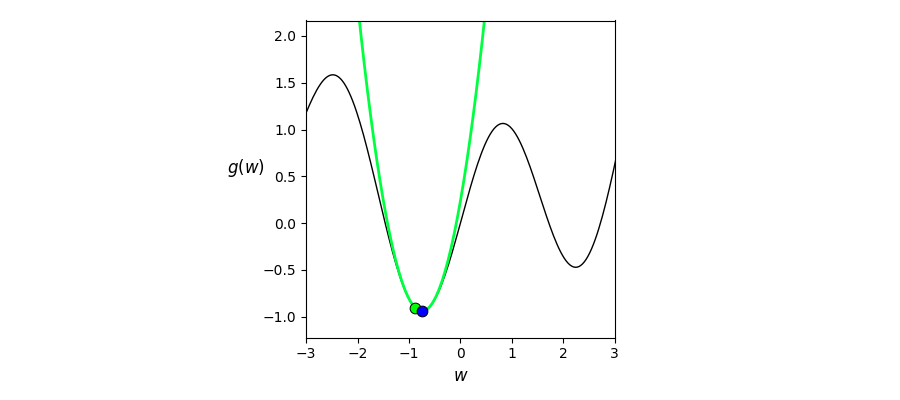
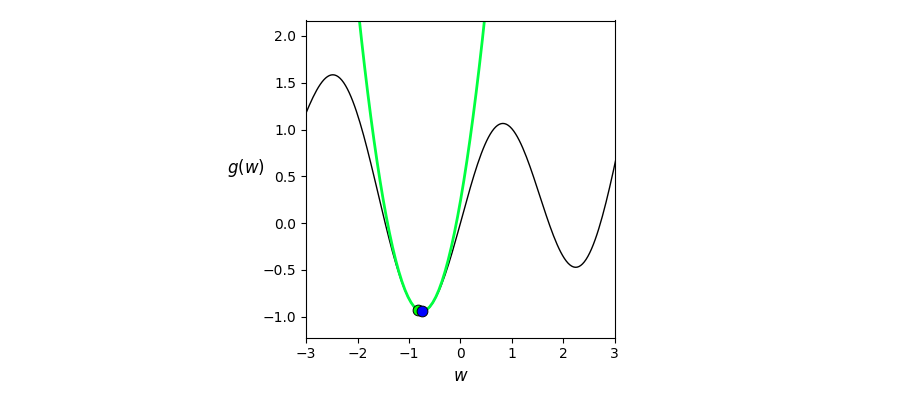
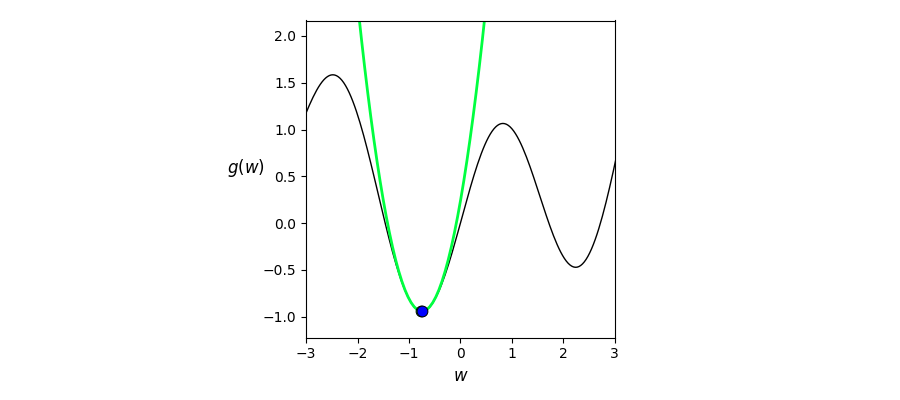
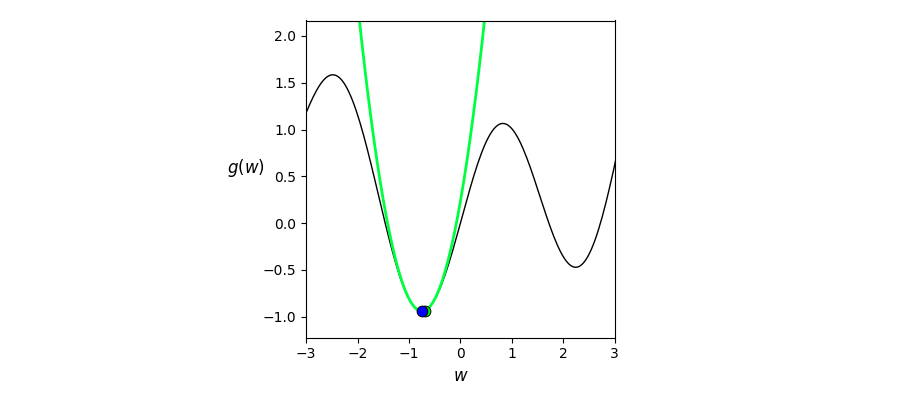
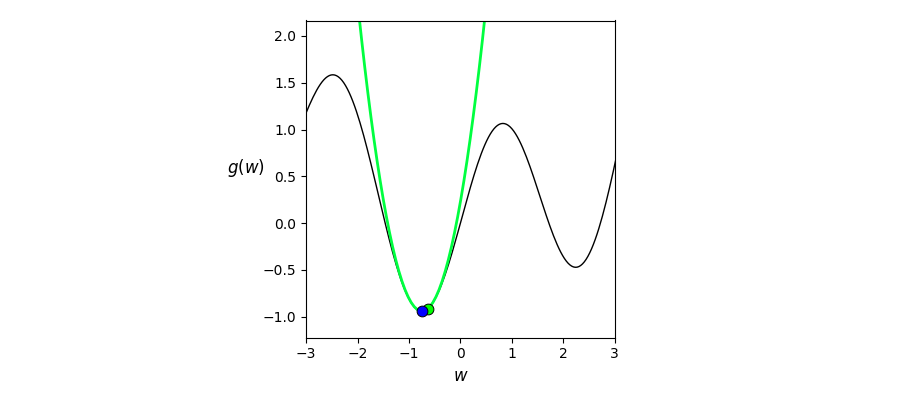
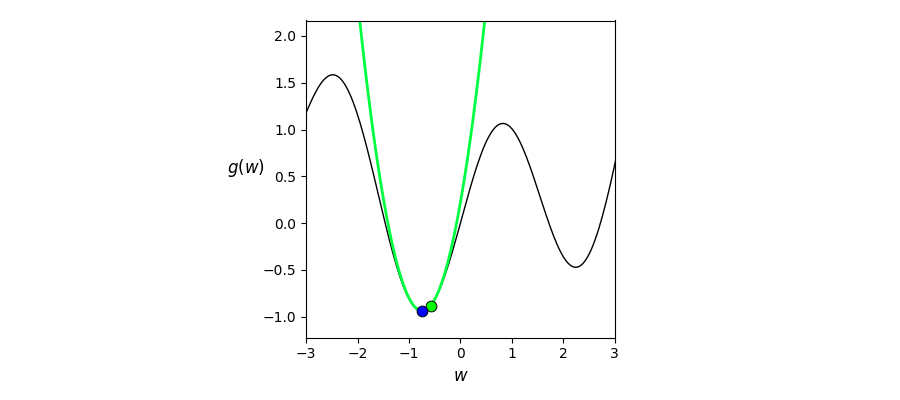
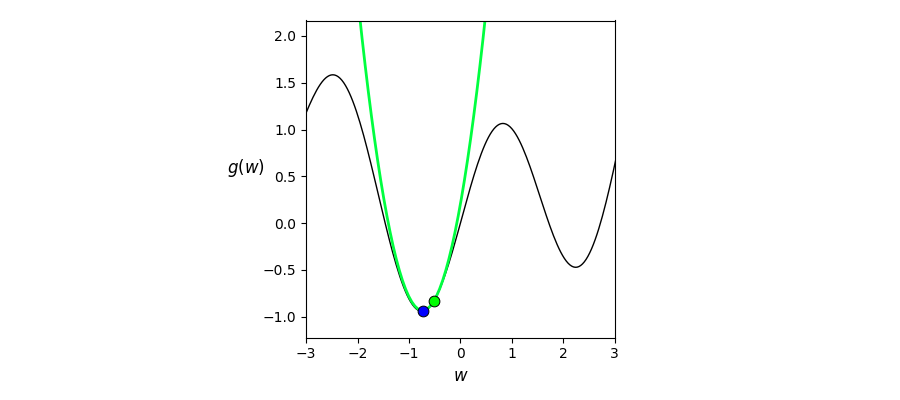
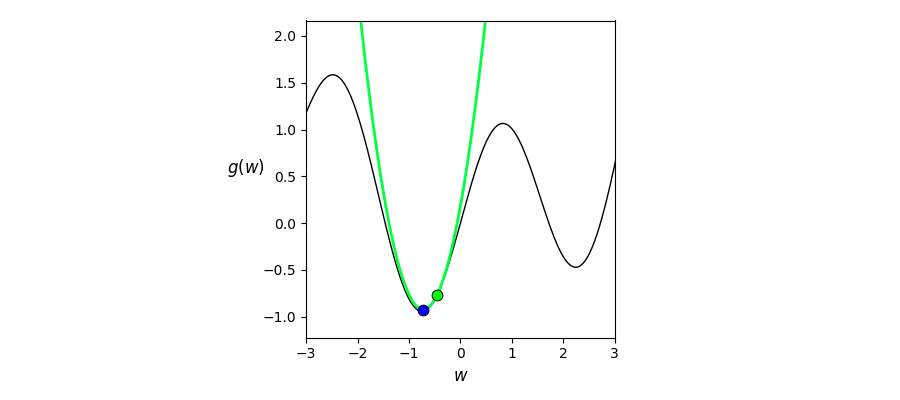
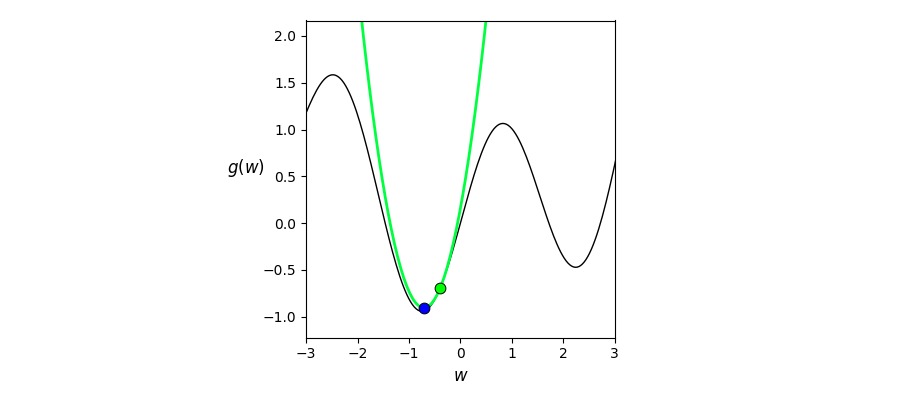
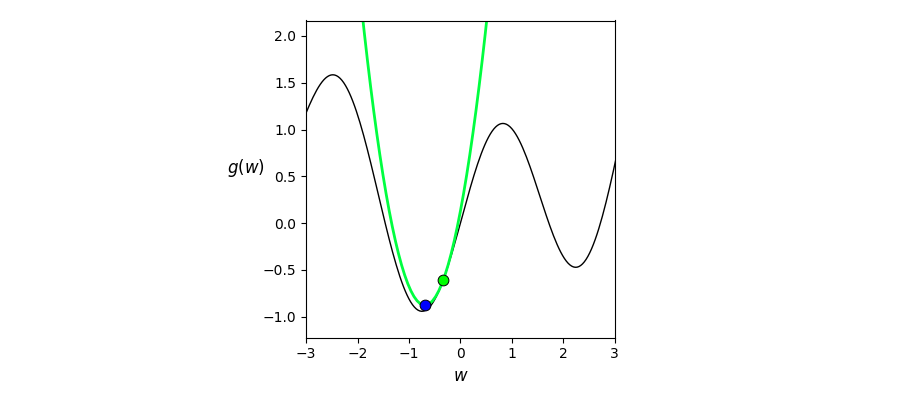
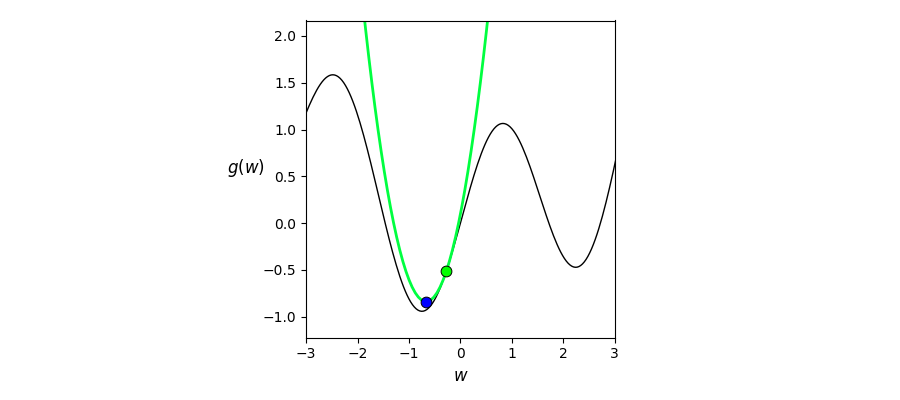
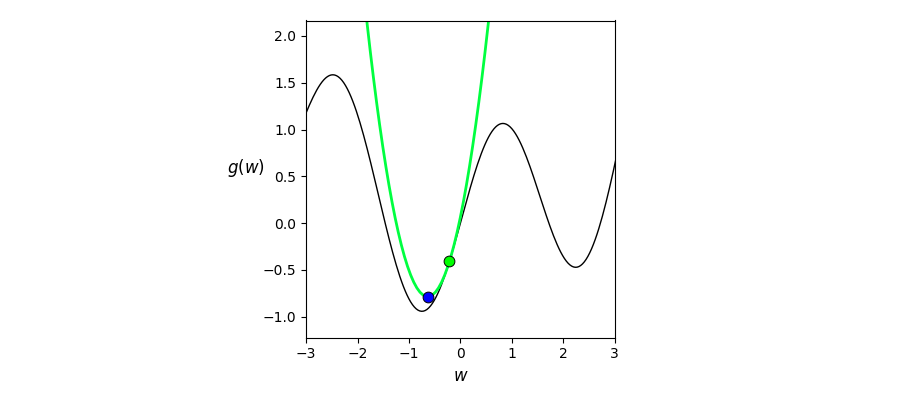
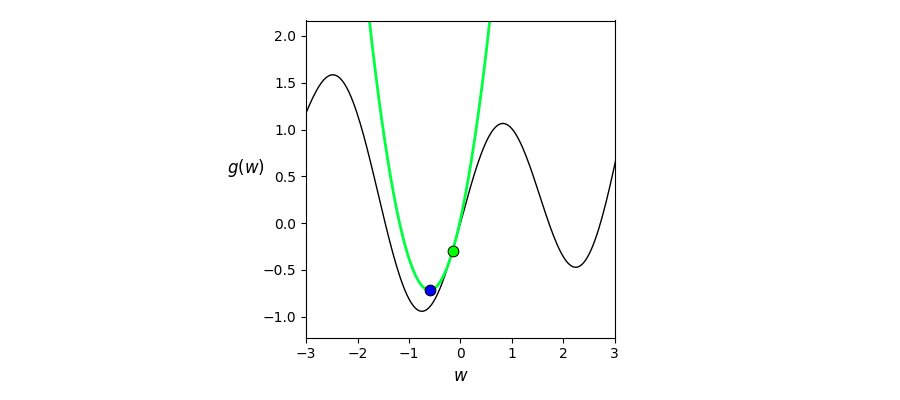
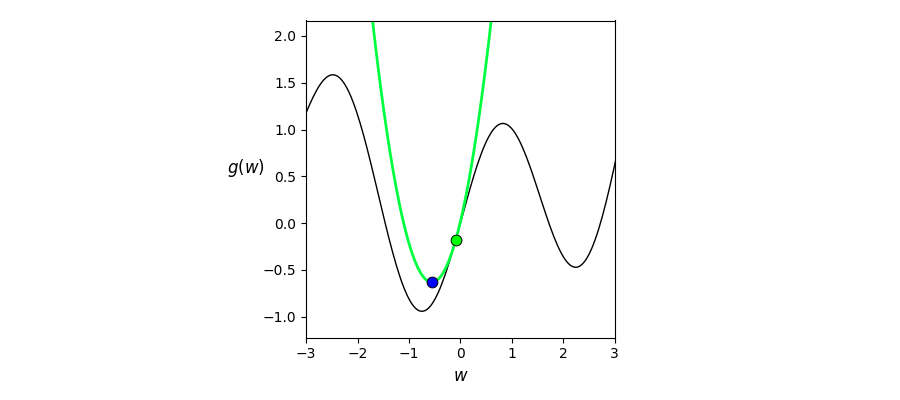
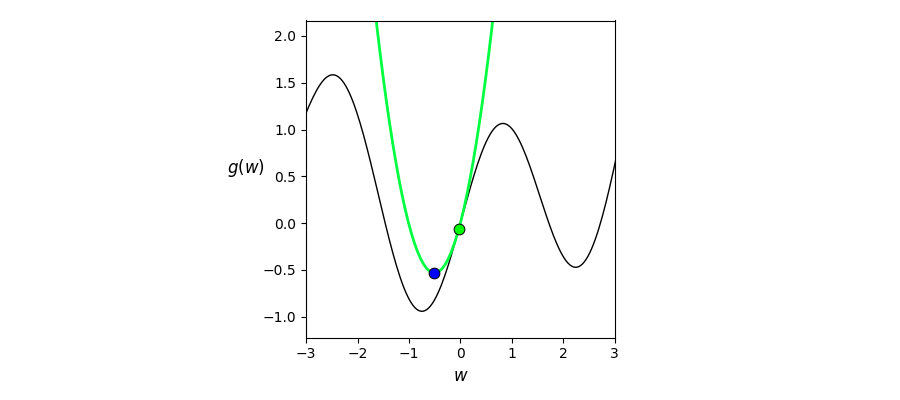
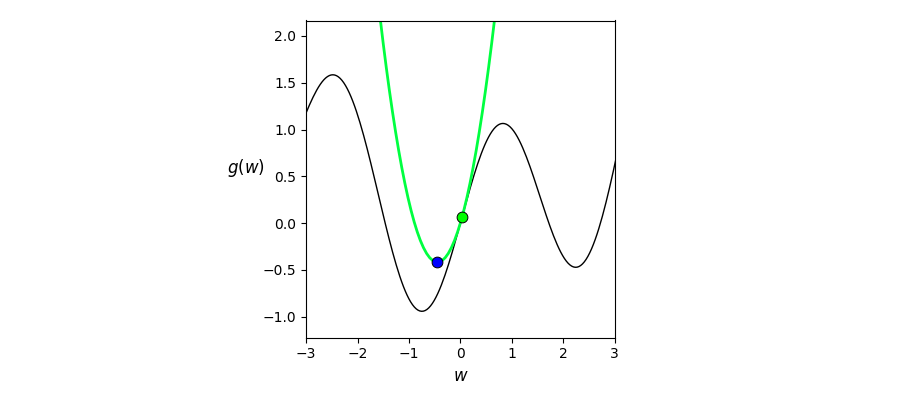
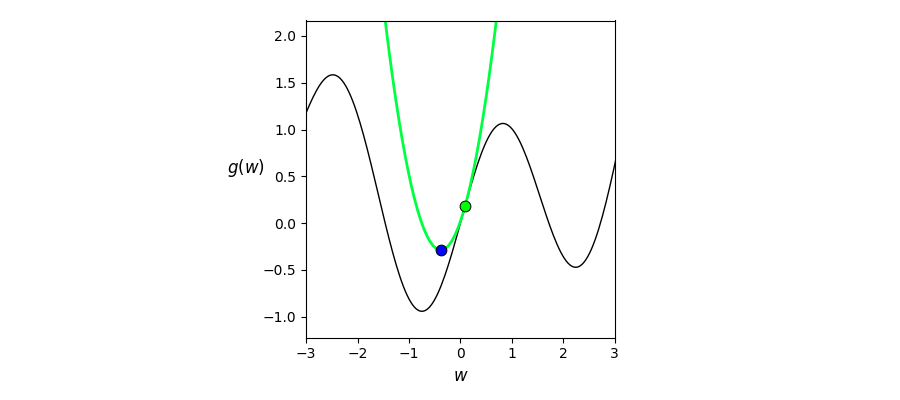
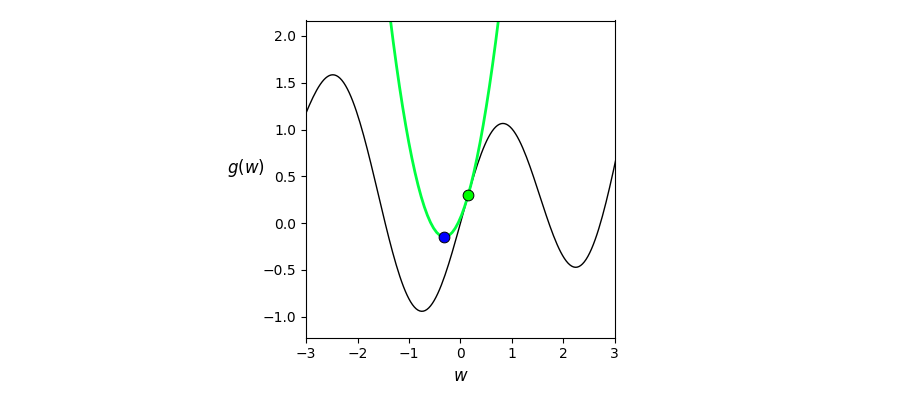
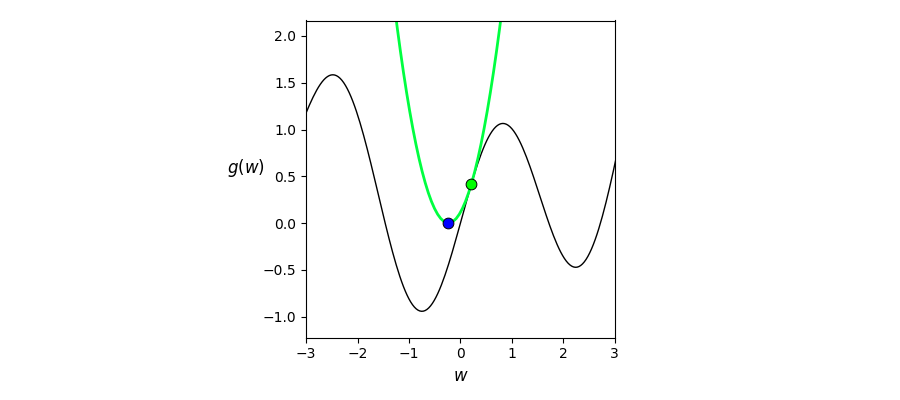
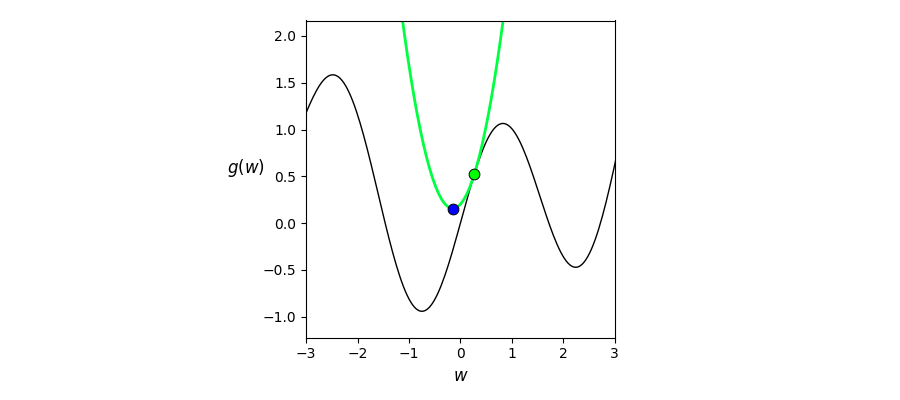
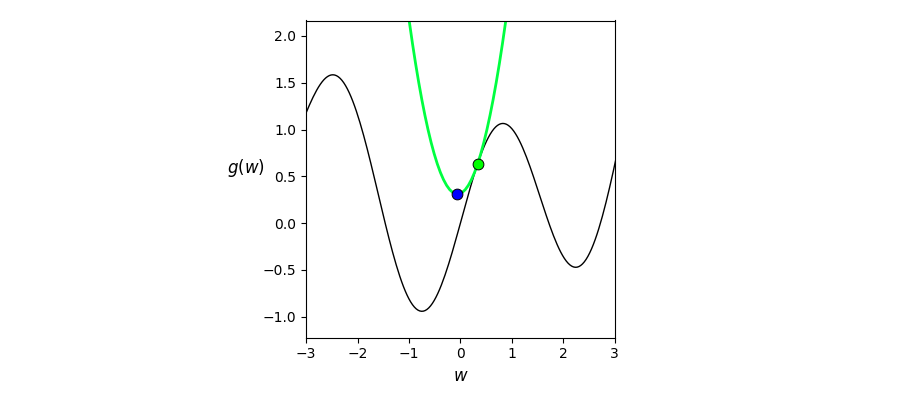
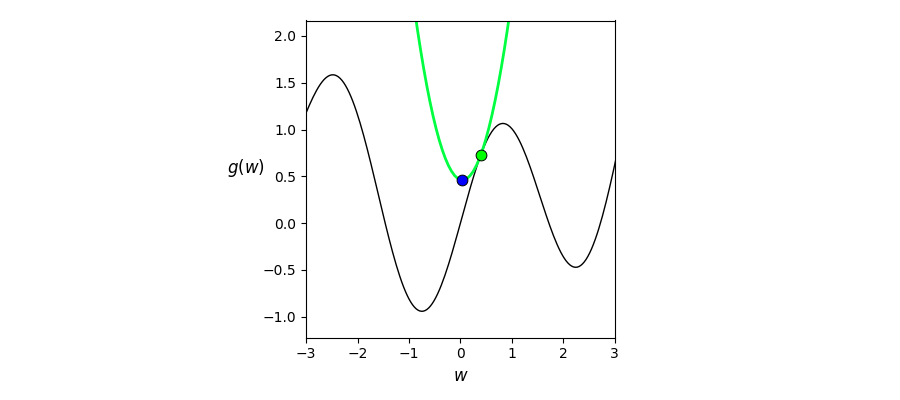
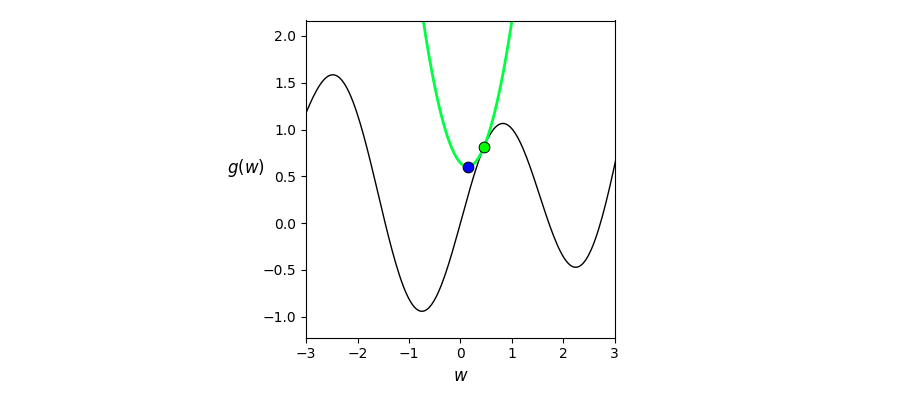
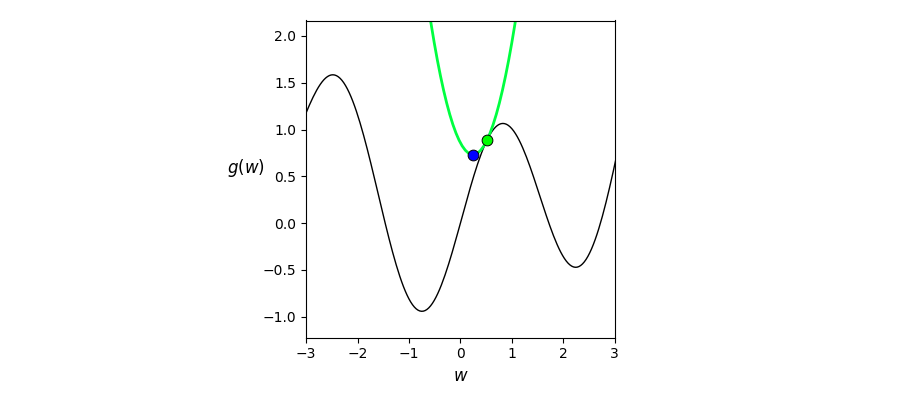
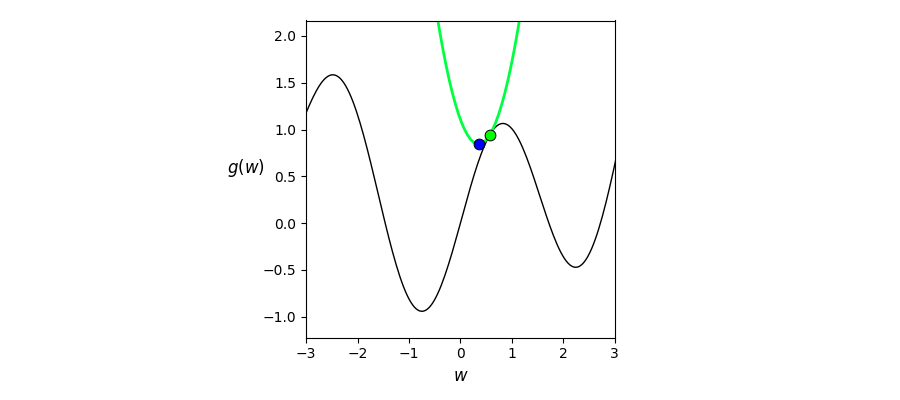
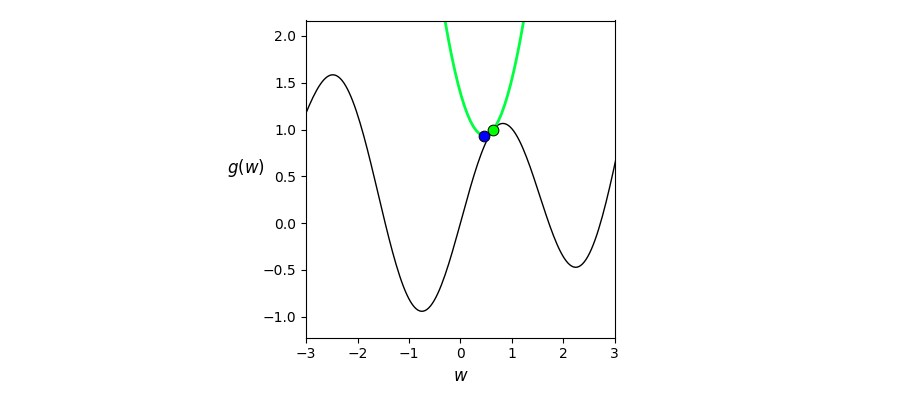
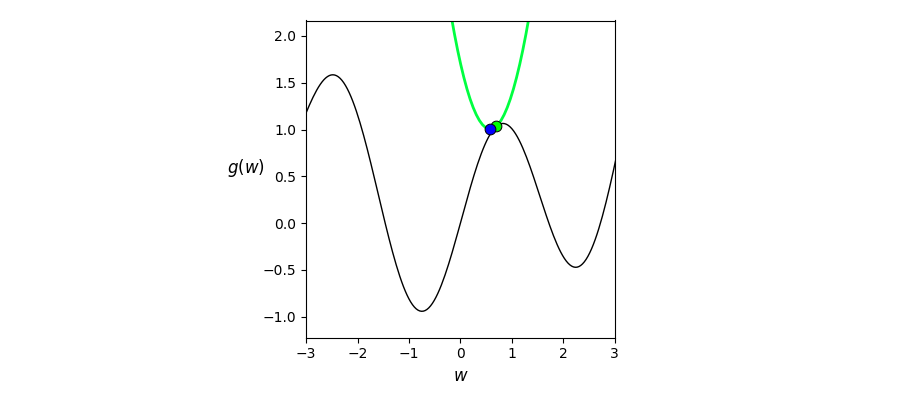
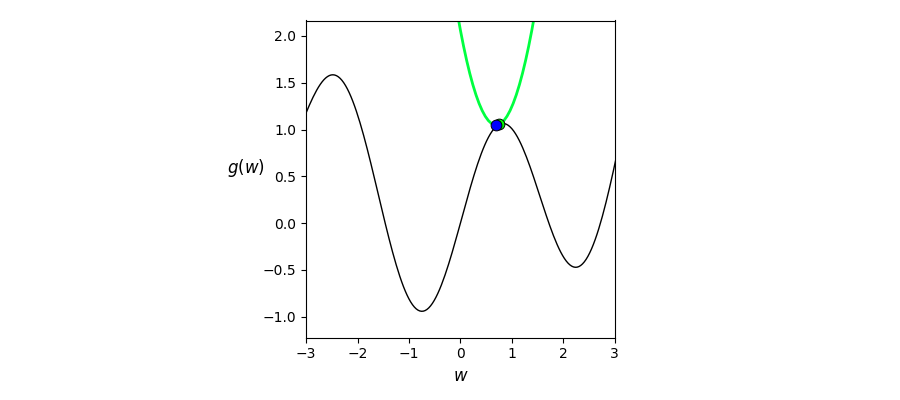
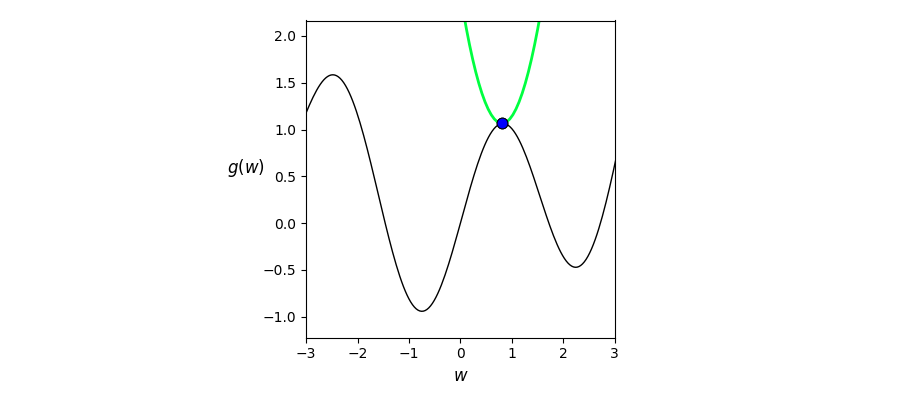
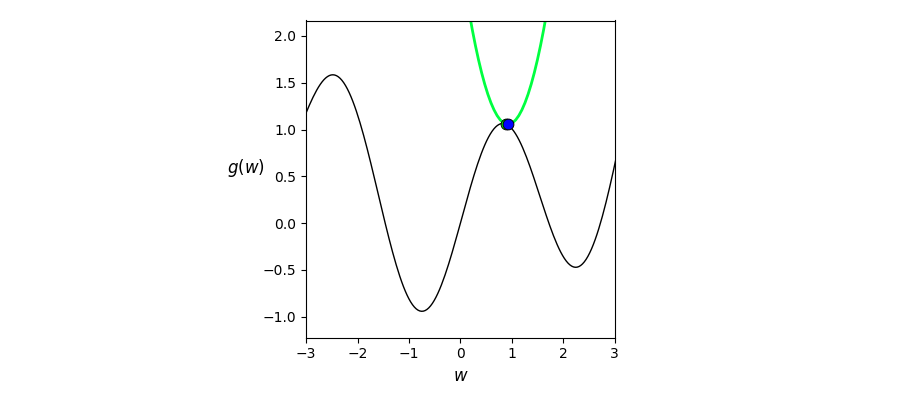
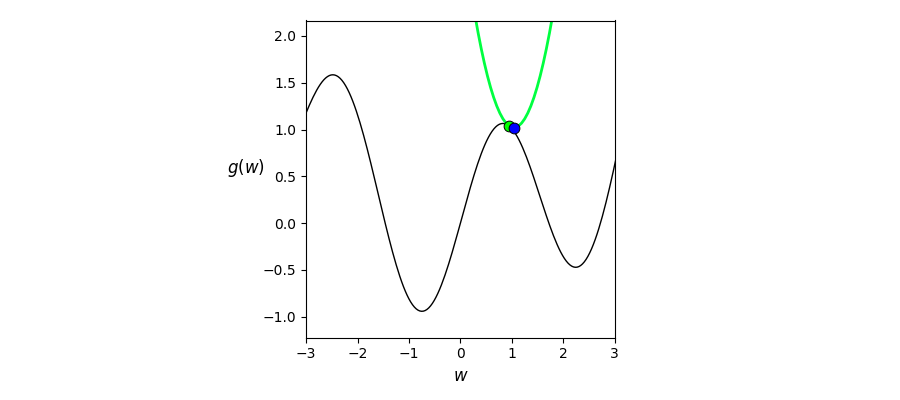
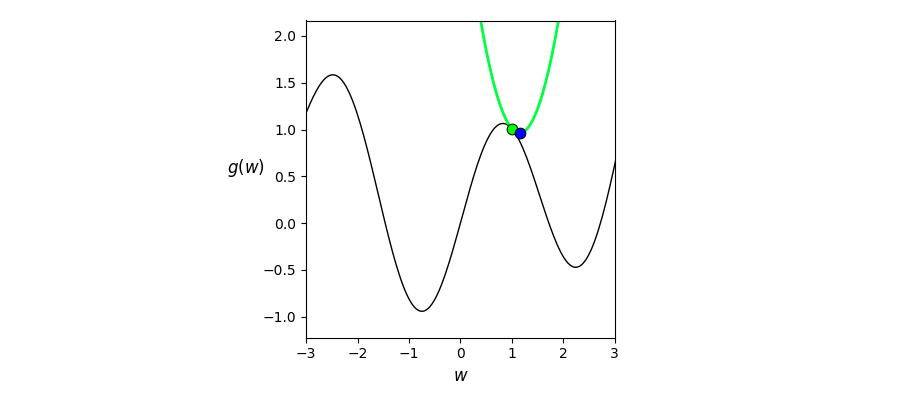
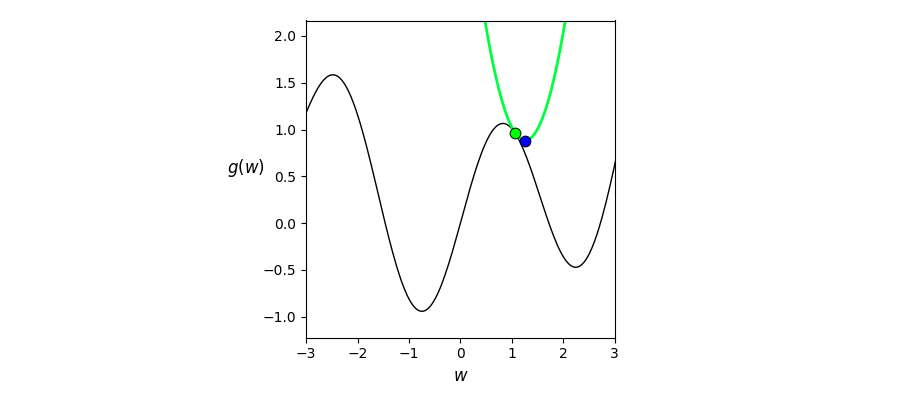
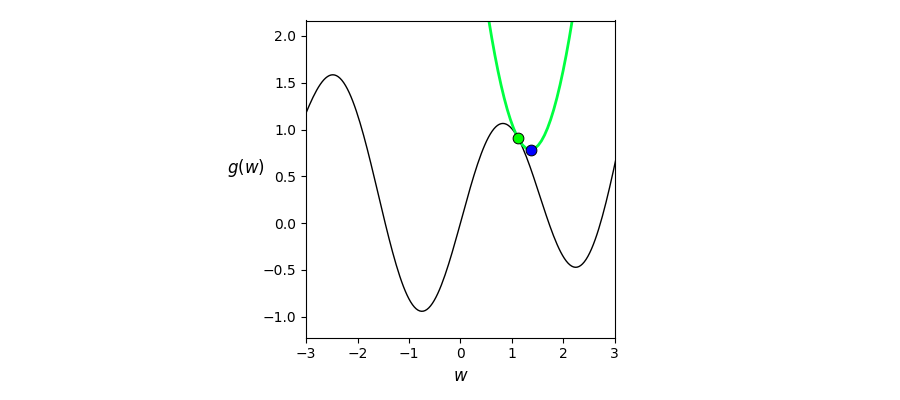
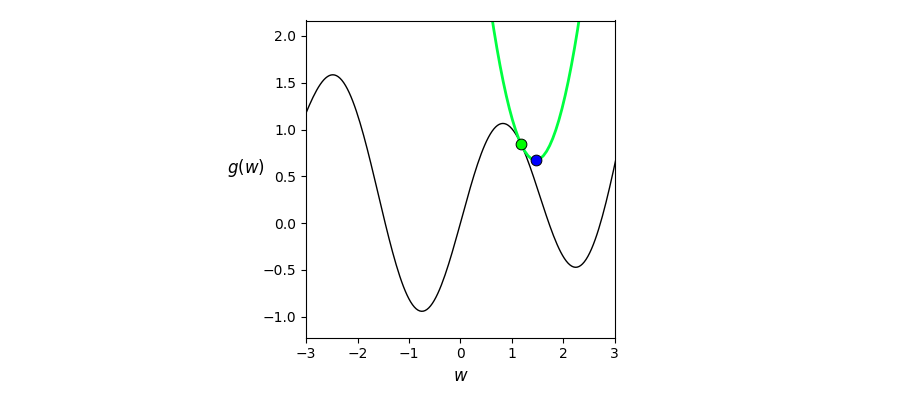
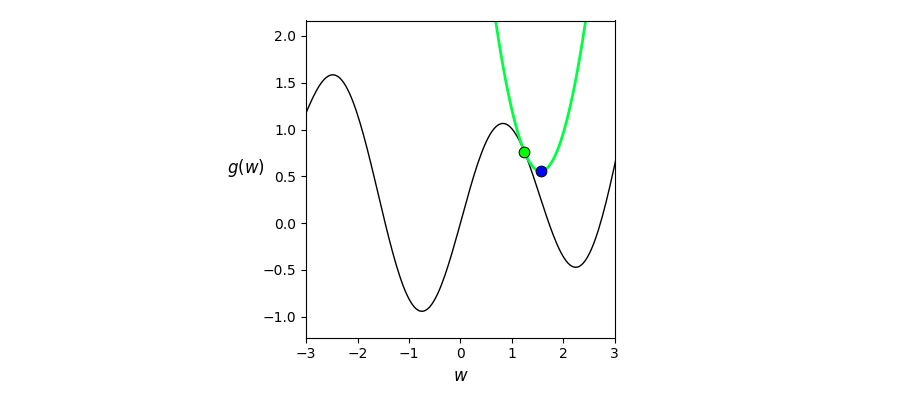
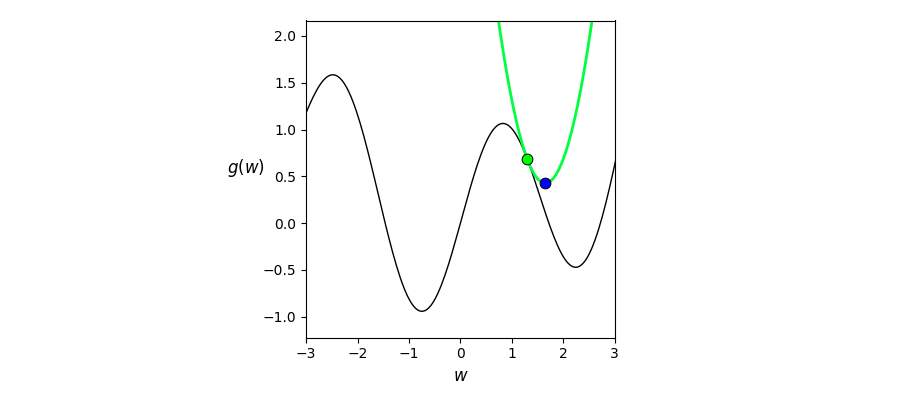
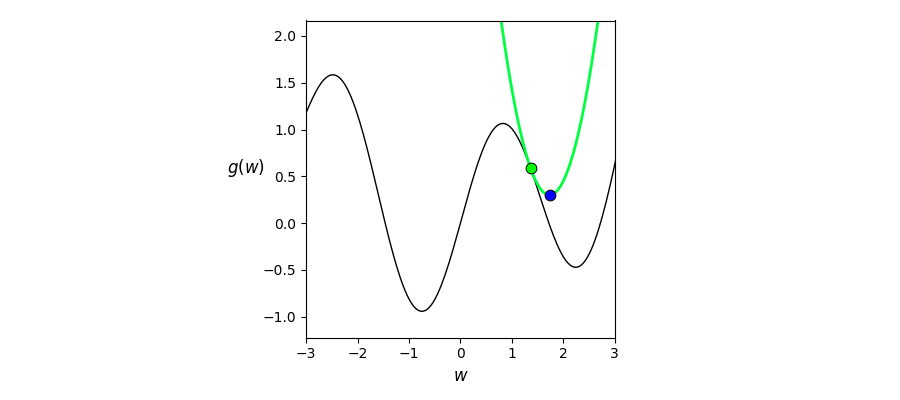
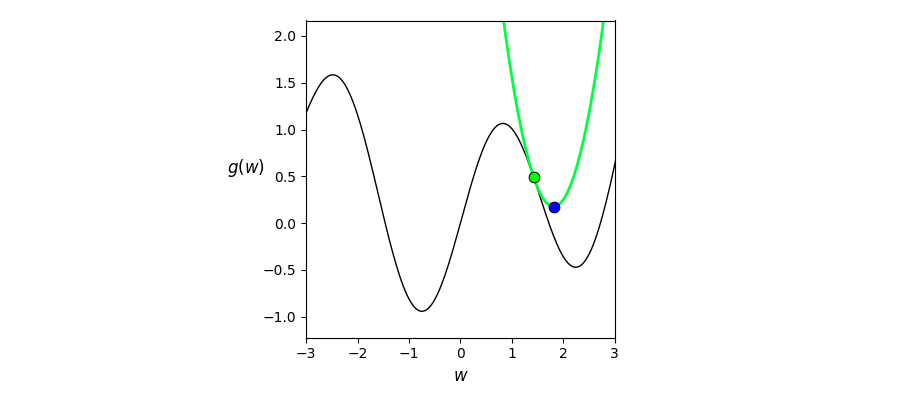
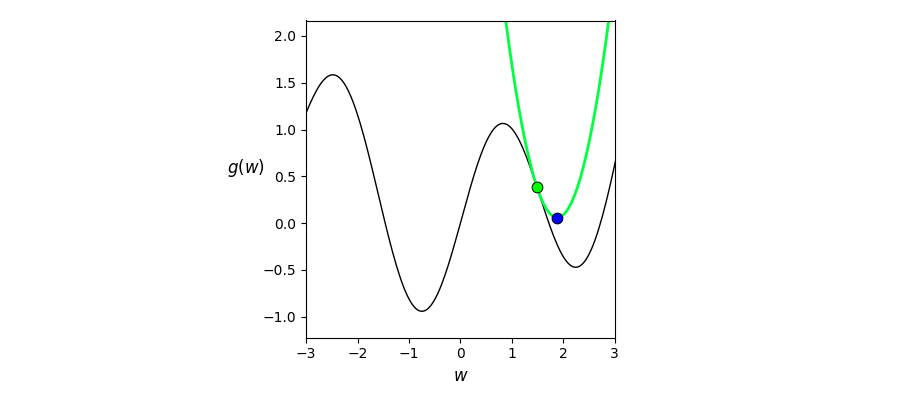
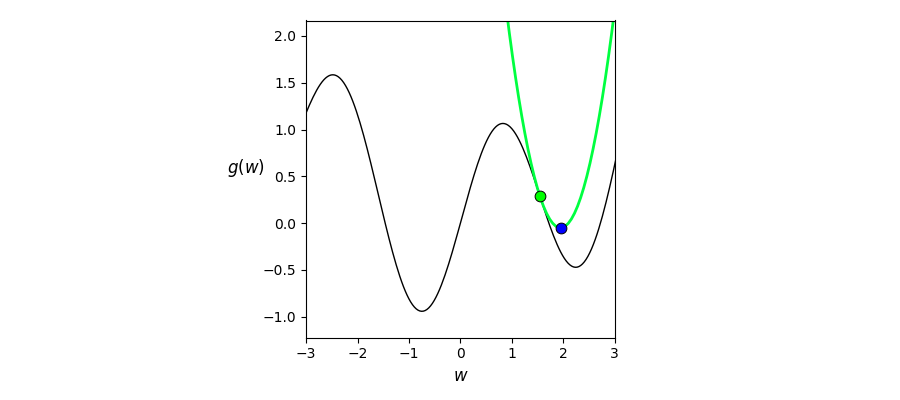
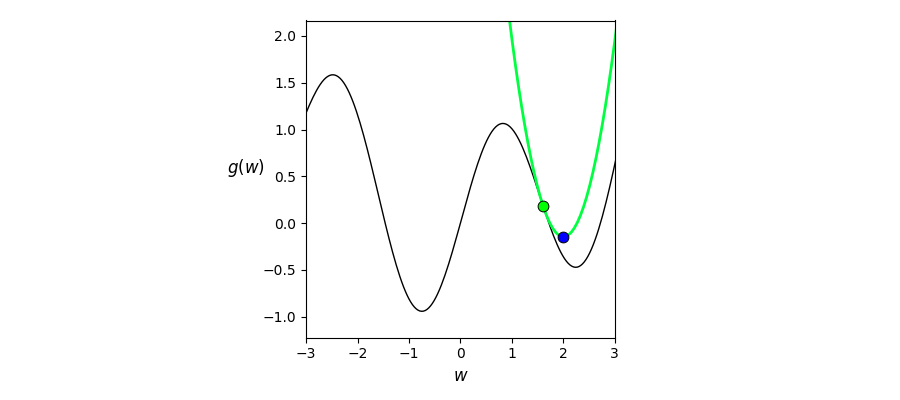
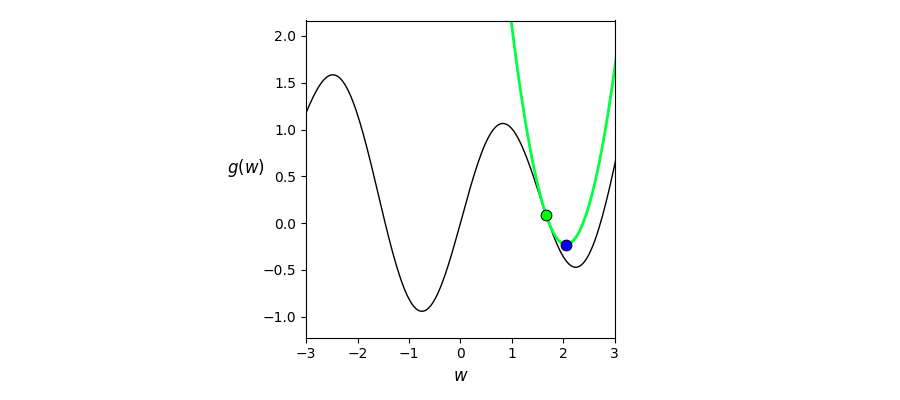
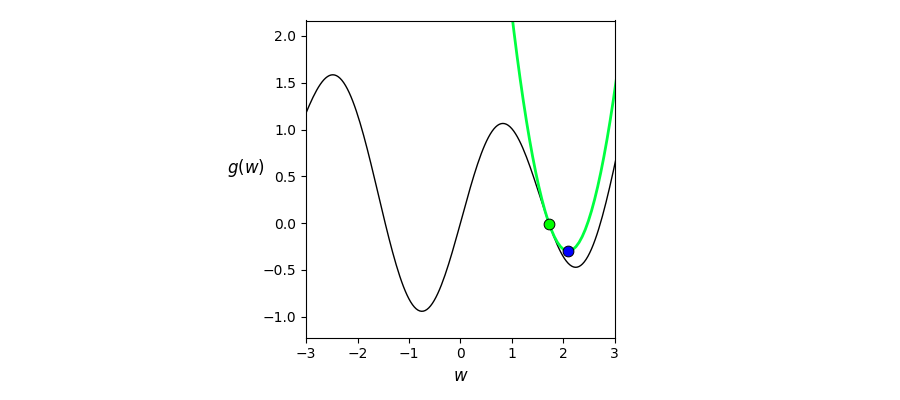
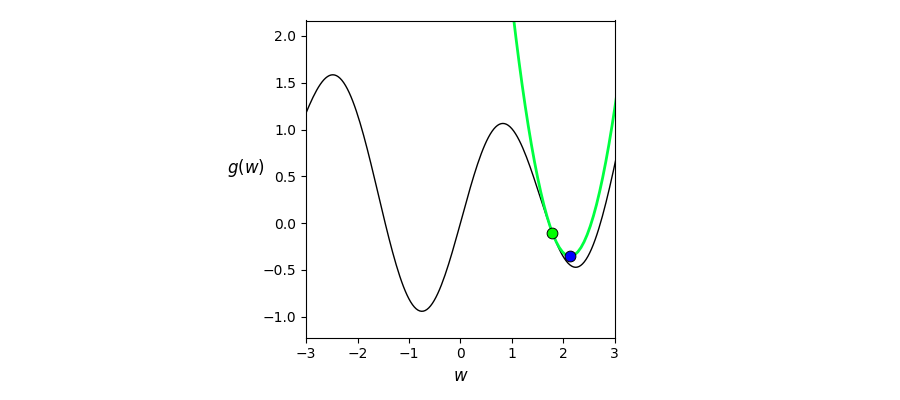
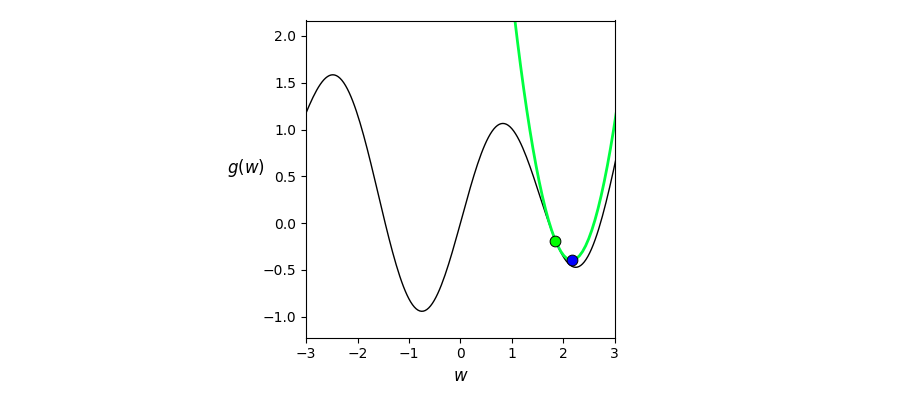
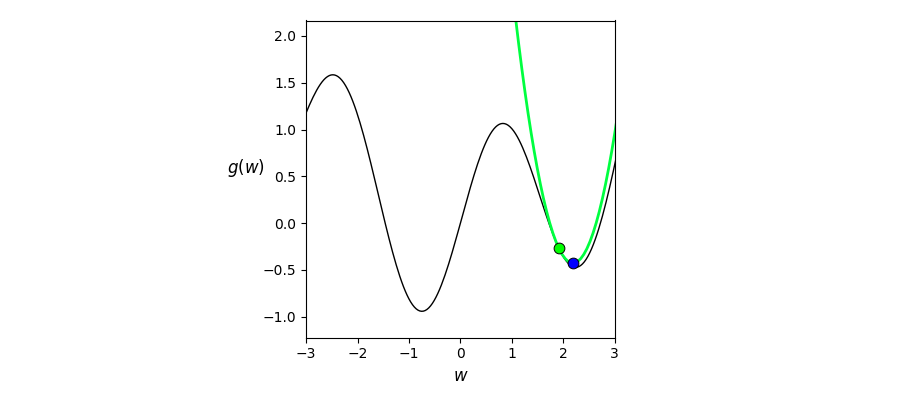
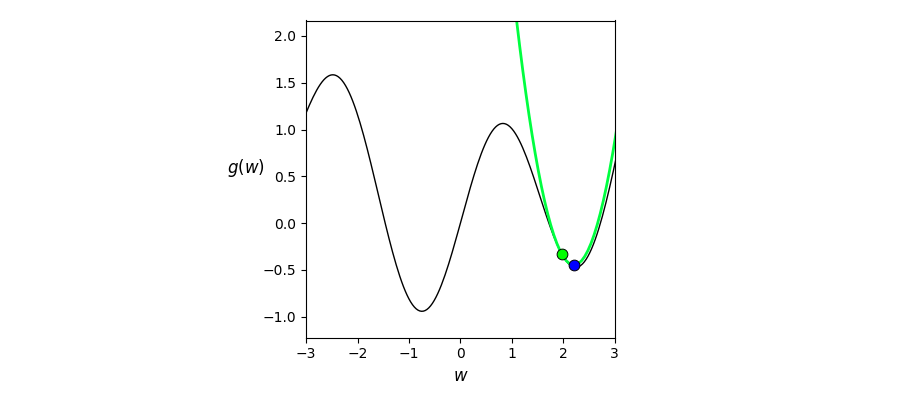
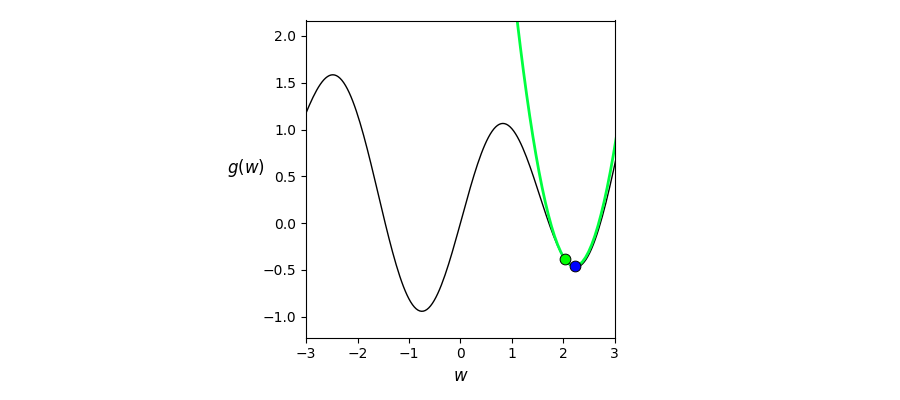
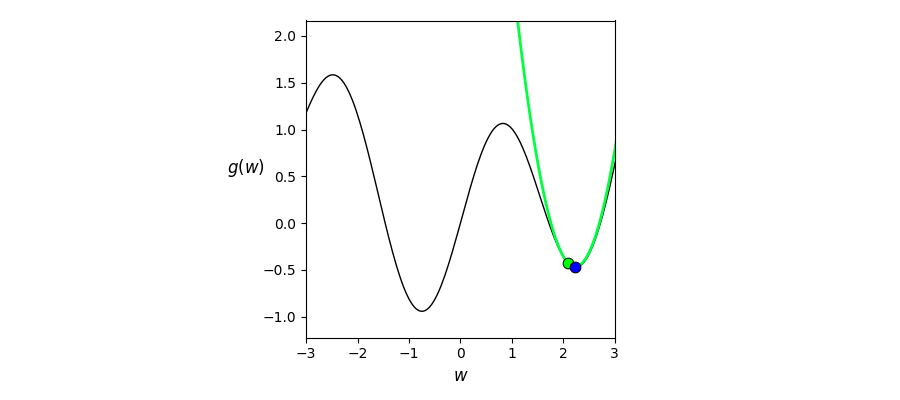
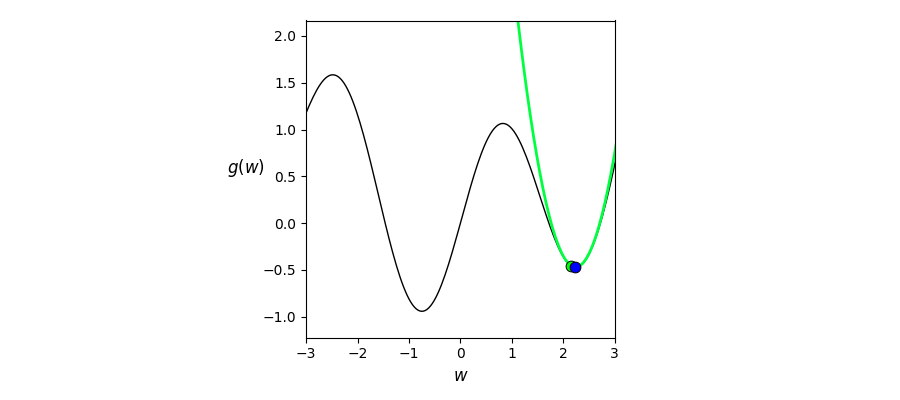
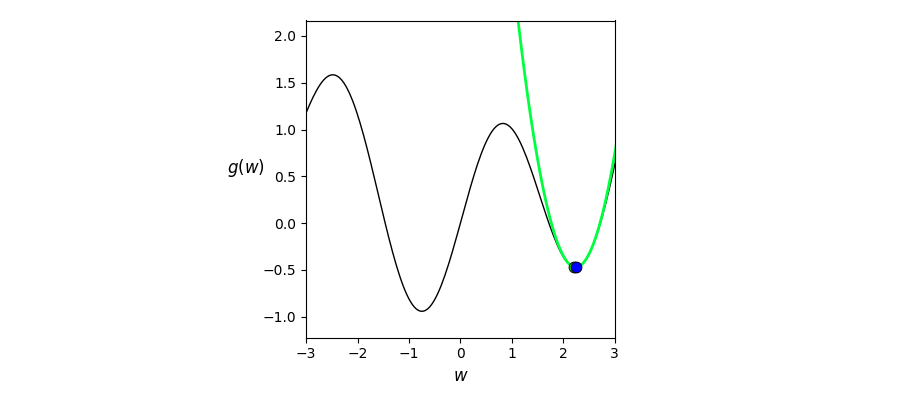
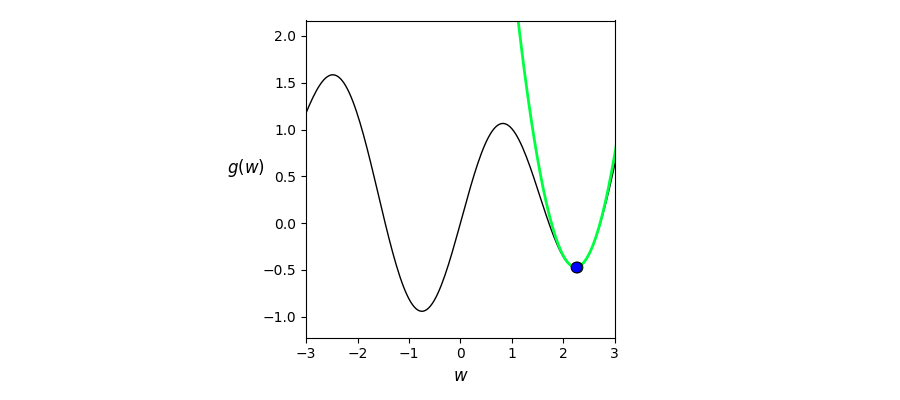
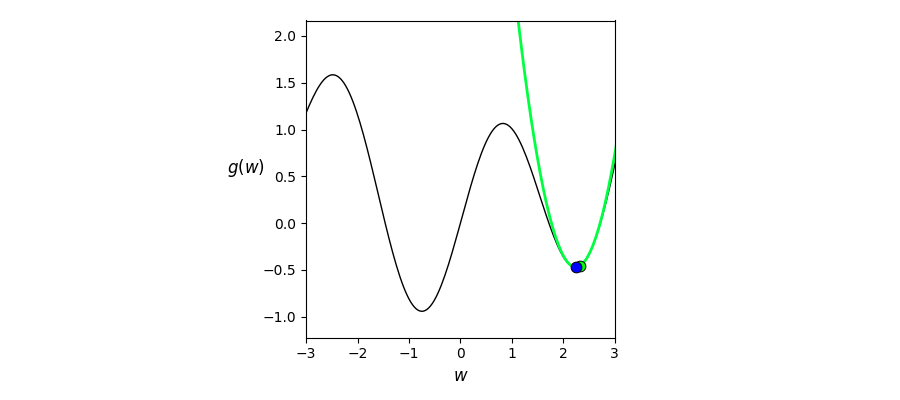
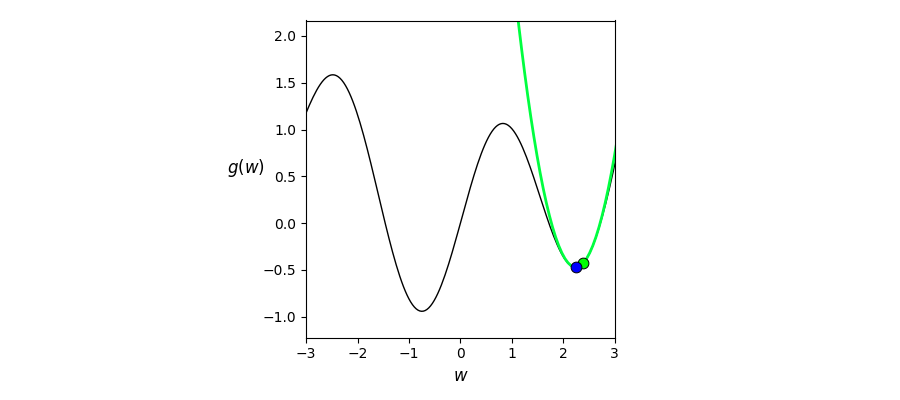
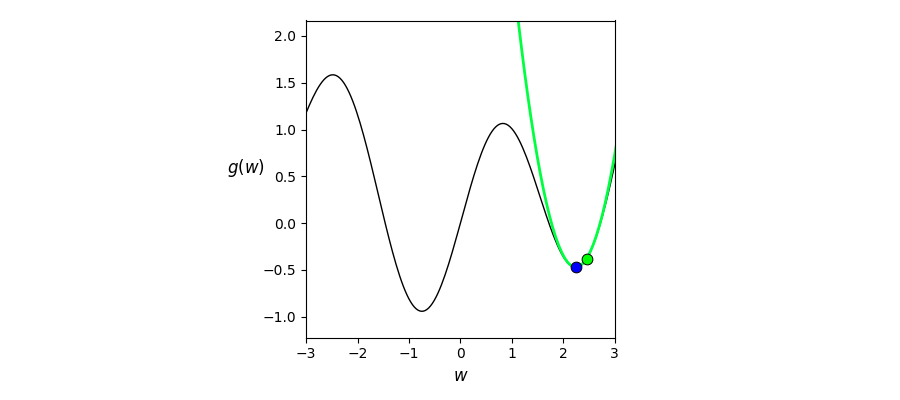
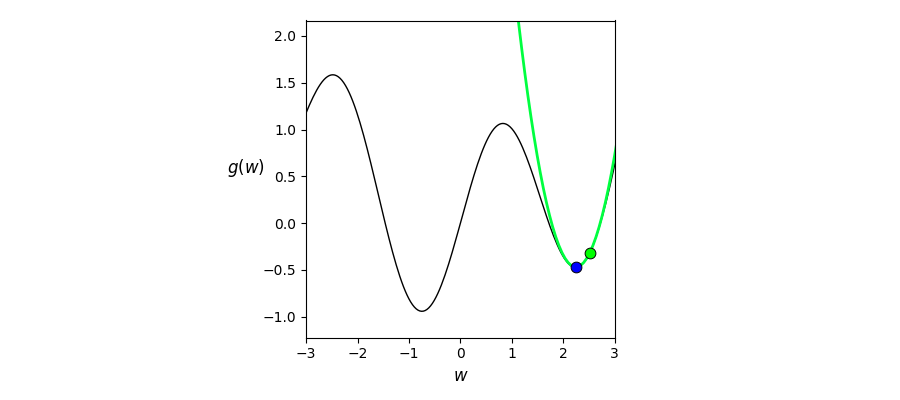
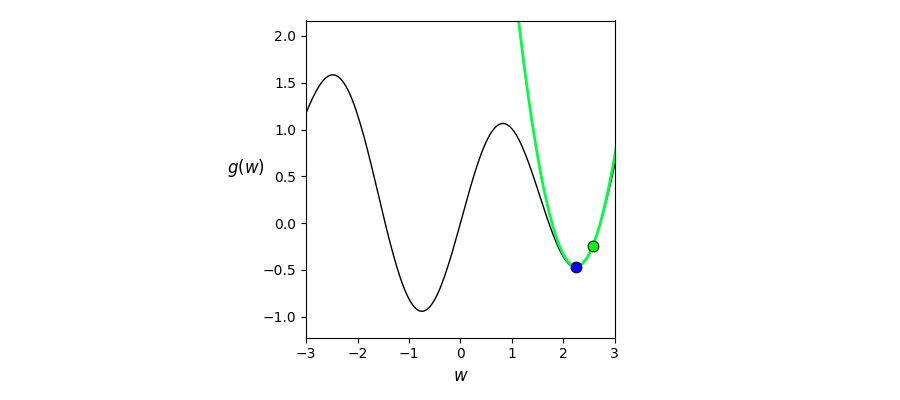
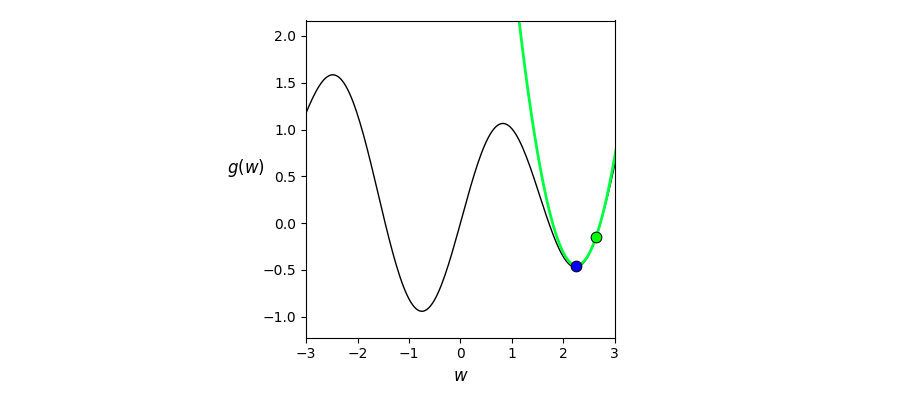
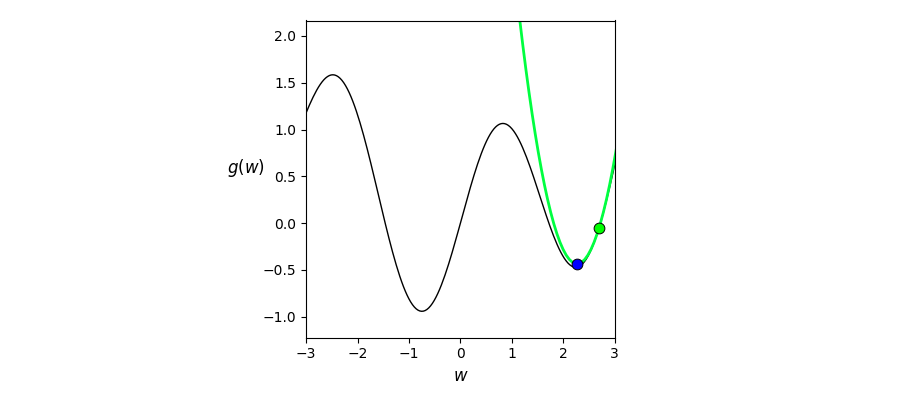
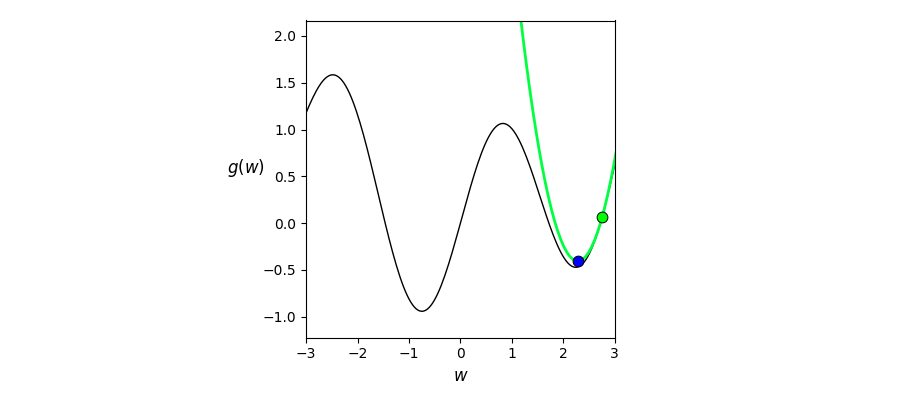
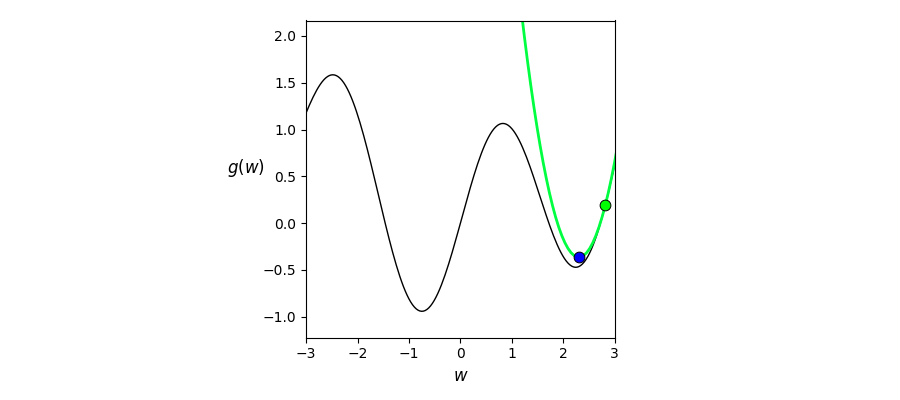
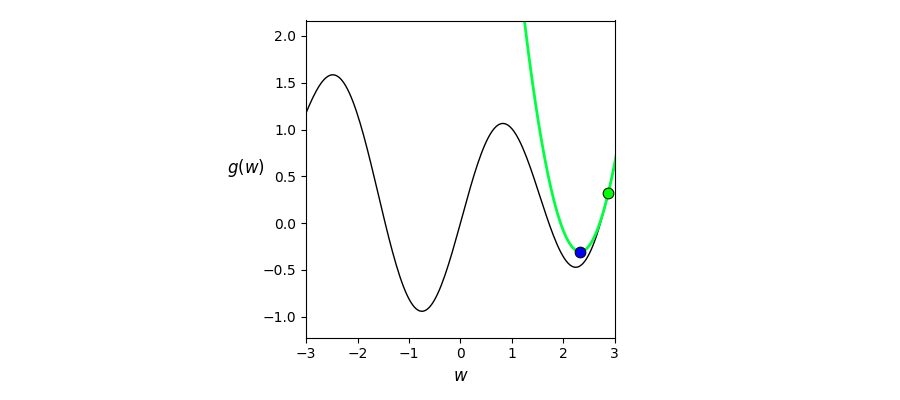
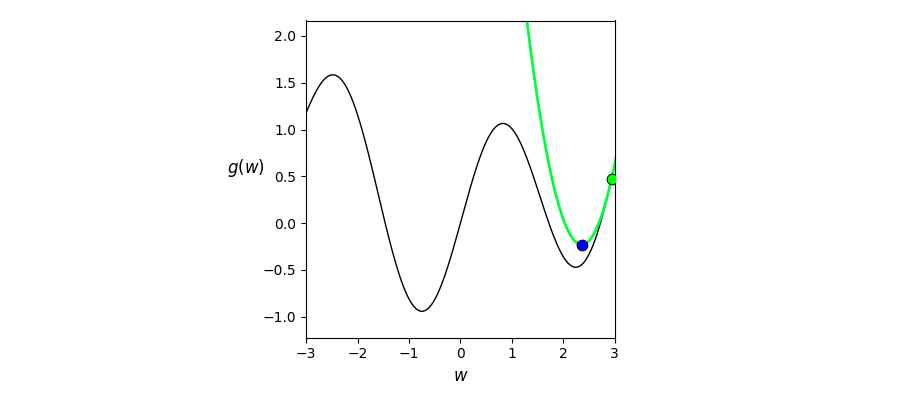
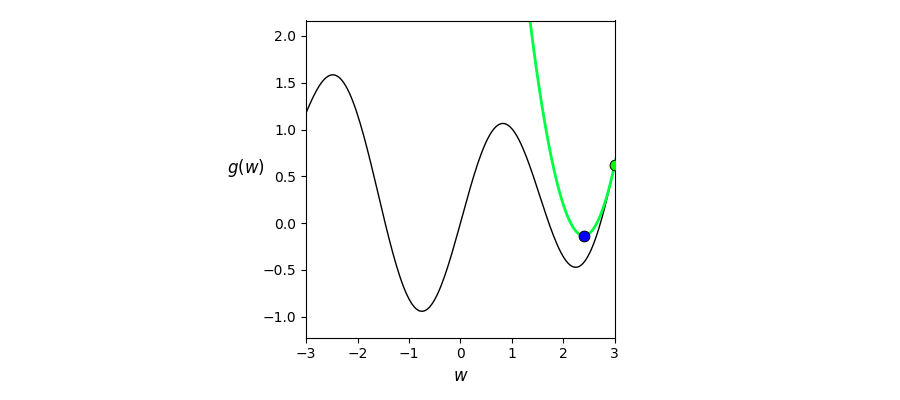

In [24]:
g = lambda w: np.sin(2*w) + 0.1*w**2
num_frames = 100

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.lipschitz_majorizer.visualizer(g=g);

# run it
demo.animate_it(num_frames = num_frames,max_val = 3)

# Reza toy

<IPython.core.display.Javascript object>


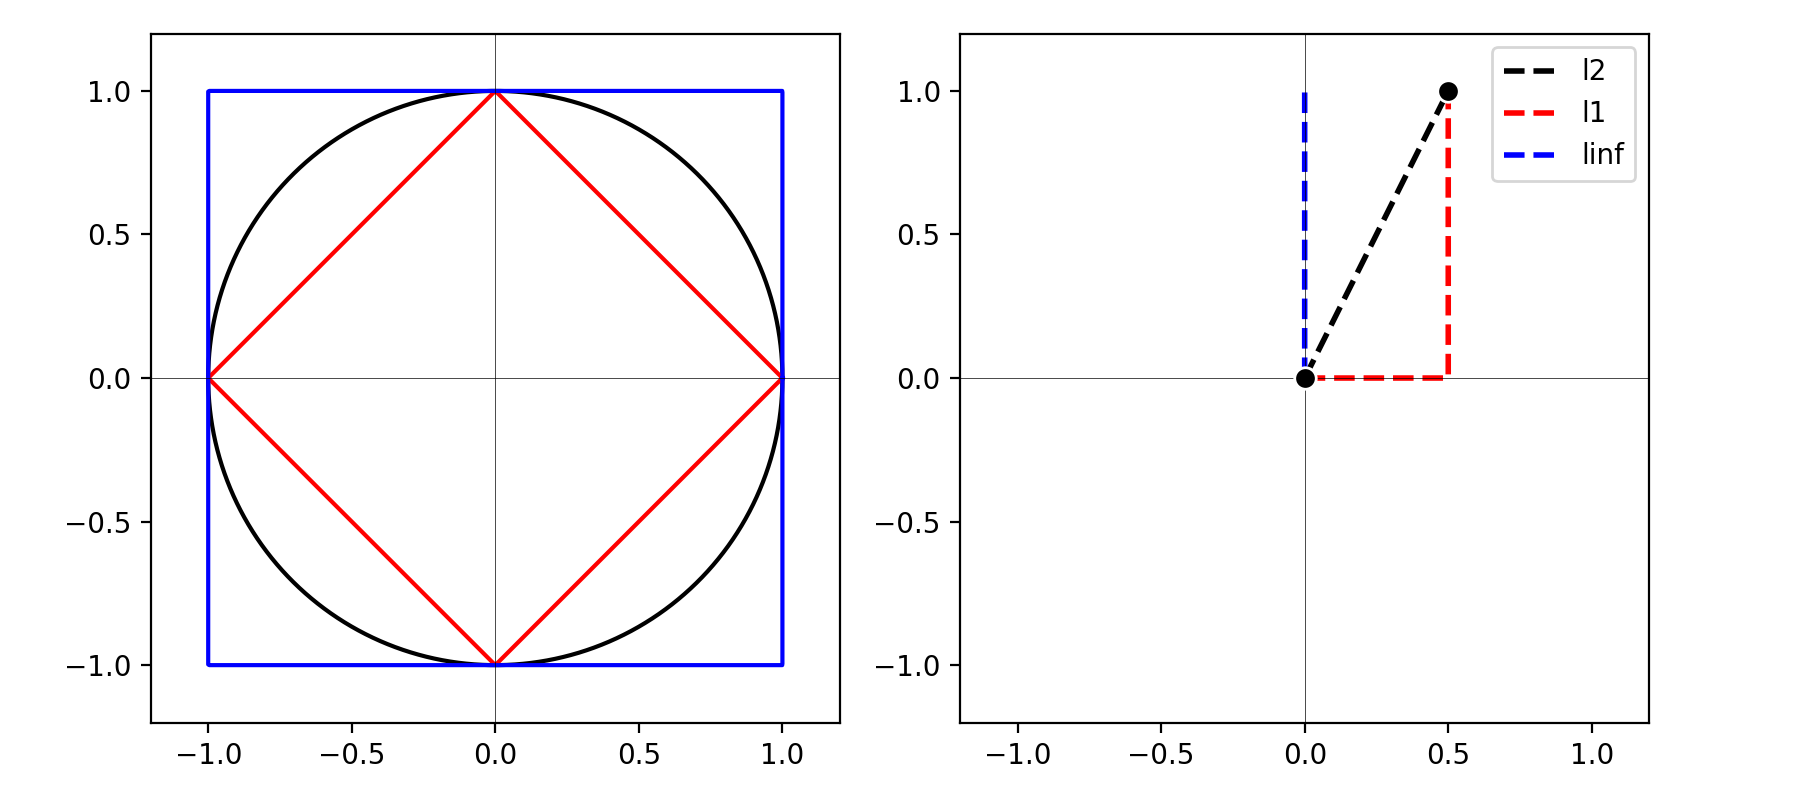

In [69]:
# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.norm_visualizer.visualizer();

# run it
pt1 = [0,0]; pt2 = [0.5,1]
demo.draw_it(pt1,pt2)

# Coordinate descent toy

When given a function like

$$
g(w_1,w_2) = \left(w_1w_2 - 0.1\right)^2
$$

$$
\begin{align}
\
\frac{\partial}{\partial w_1} g\left(w_1,w_2 \right) = 2\left(w_1w_2 - a\right) = 0 \\
\frac{\partial}{\partial w_2} g\left(w_1,w_2 \right) = 2\left(w_1w_2 - a\right) = 0
\end{align}
$$

$w_1w_2 = a$

<IPython.core.display.Javascript object>


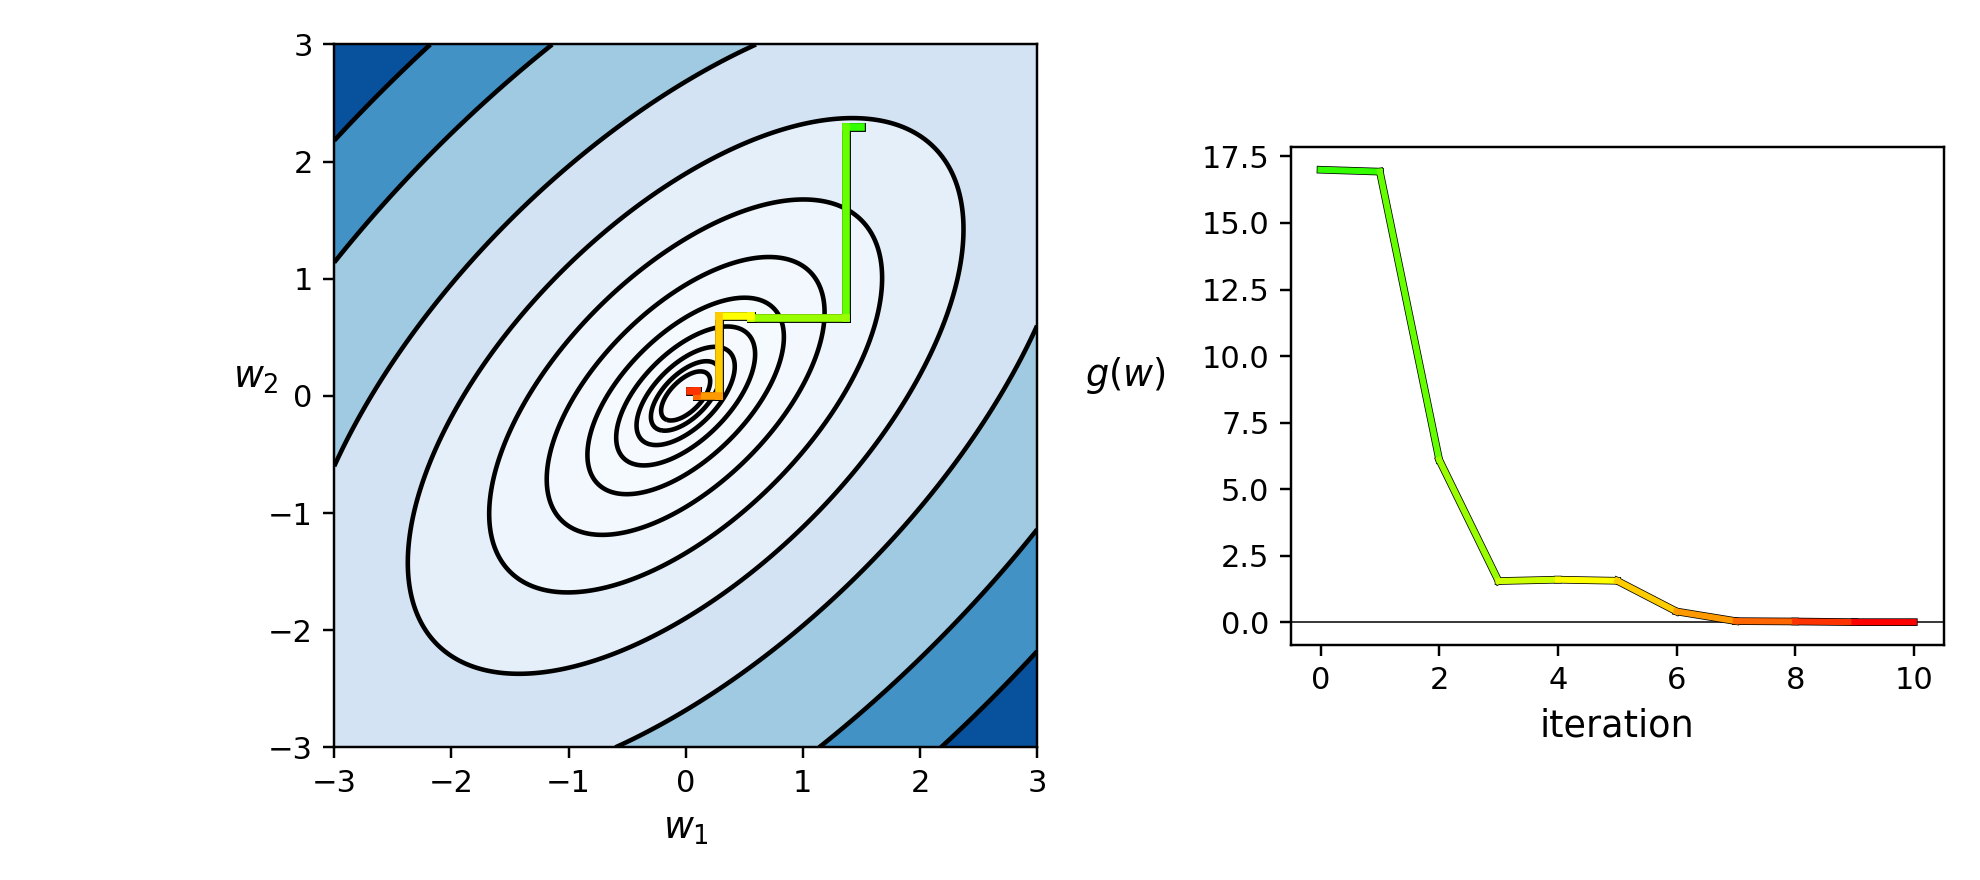

In [32]:
# what function should we play with?  Defined in the next line.
g = lambda w: 5*w[0]**2 + 5*w[1]**2 - 6*w[0]*w[1]

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.coordinate_descent.visualizer();
w_init = [1.5,2.3]; max_its = 5;

demo.run(g,w_init,max_its,num_contours = 30,xmin = -3, xmax = 3, ymin = -3, ymax = 3)

<IPython.core.display.Javascript object>


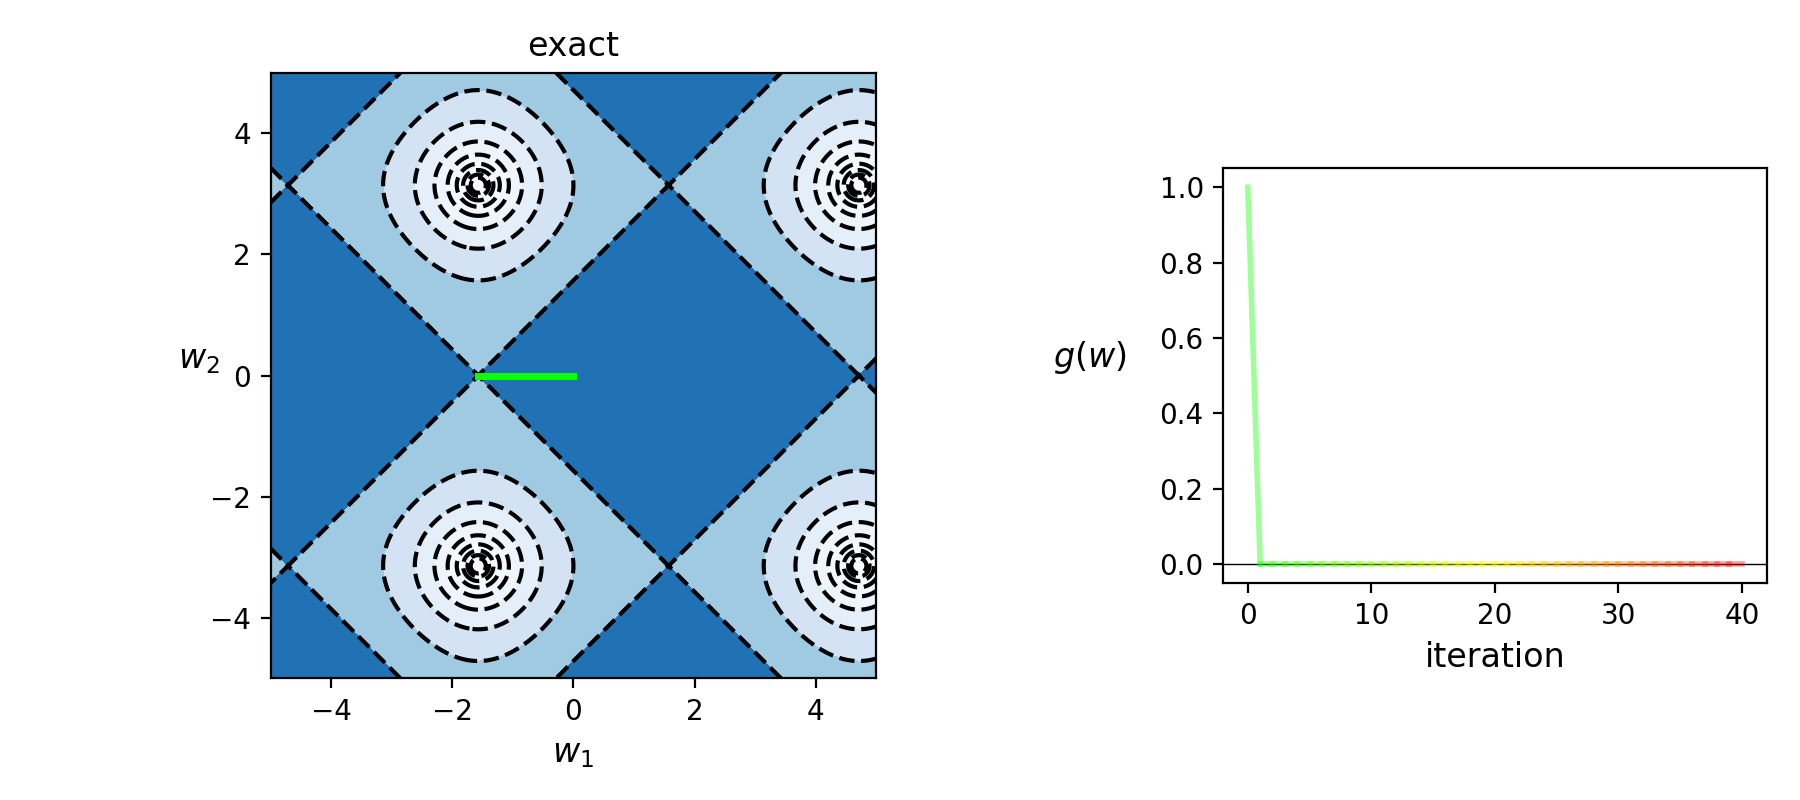

In [31]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.sin(w[0]) + np.cos(w[1]) 

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.coordinate_descent.visualizer();
w_init = [0,0]; max_its = 20;maxval = 5;

demo.run(g,w_init,max_its,num_contours = 30,xmin = -maxval, xmax = maxval, ymin = -maxval, ymax = maxval)